#### About Delhivery

Delhivery is the largest and fastest-growing fully integrated player in India by revenue in Fiscal 2021. They aim to build the operating system for commerce, through a combination of world-class infrastructure, logistics operations of the highest quality, and cutting-edge engineering and technology capabilities.

The Data team builds intelligence and capabilities using this data that helps them to widen the gap between the quality, efficiency, and profitability of their business versus their competitors.

#### Problem Statement
===============

The company wants to understand and process the data coming out of data engineering pipelines:

• Clean, sanitize and manipulate data to get useful features out of raw fields

• Make sense out of the raw data and help the data science team to build forecasting models on it

In [1]:
# import required modules
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
current_palette = sns.color_palette('colorblind')
from datetime import datetime,timedelta,date
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [2]:
# read data
del_df = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv?1642751181")

In [3]:
del_df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [4]:
# Checking the dimensions of the dataset
print("Rows : {} ,Columns : {}".format(del_df.shape[0],del_df.shape[1]))

Rows : 144867 ,Columns : 24


In [5]:
del_df.info() #Display Details

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

Some of the date columns are of type "object", Need to convert these into datetime type

In [6]:
# Convert to datetime
del_df["trip_creation_time"] = del_df["trip_creation_time"].apply(lambda x:datetime.strptime(x, "%Y-%m-%d %H:%M:%S.%f" ))
del_df["od_start_time"] = del_df["od_start_time"].apply(lambda x:datetime.strptime(x, "%Y-%m-%d %H:%M:%S.%f" ))
del_df["od_end_time"] = del_df["od_end_time"].apply(lambda x:datetime.strptime(x, "%Y-%m-%d %H:%M:%S.%f" ))
del_df['cutoff_timestamp'] = pd.to_datetime(del_df['cutoff_timestamp'], errors='coerce')

Since "cutoff_timestamp"  has different formats for datetime strings, we have used the "to_datetime" function from Pandas. This function is capable of parsing a wide range of datetime formats and can handle different formats in the same column.

In [7]:
del_df.info() #Display Details after converting certain columns to datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144867 non-null  object        
 1   trip_creation_time              144867 non-null  datetime64[ns]
 2   route_schedule_uuid             144867 non-null  object        
 3   route_type                      144867 non-null  object        
 4   trip_uuid                       144867 non-null  object        
 5   source_center                   144867 non-null  object        
 6   source_name                     144574 non-null  object        
 7   destination_center              144867 non-null  object        
 8   destination_name                144606 non-null  object        
 9   od_start_time                   144867 non-null  datetime64[ns]
 10  od_end_time                     144867 non-null  datetim

In [11]:
(del_df.isnull().sum()/len(del_df))*100 # Display % of missing values

data                              0.000000
trip_creation_time                0.000000
route_schedule_uuid               0.000000
route_type                        0.000000
trip_uuid                         0.000000
source_center                     0.000000
source_name                       0.202254
destination_center                0.000000
destination_name                  0.180165
od_start_time                     0.000000
od_end_time                       0.000000
start_scan_to_end_scan            0.000000
is_cutoff                         0.000000
cutoff_factor                     0.000000
cutoff_timestamp                  0.000000
actual_distance_to_destination    0.000000
actual_time                       0.000000
osrm_time                         0.000000
osrm_distance                     0.000000
factor                            0.000000
segment_actual_time               0.000000
segment_osrm_time                 0.000000
segment_osrm_distance             0.000000
segment_fac

#### Analysis of Missing Values
=======================
1. source_name and destination_name have missing values. The % of missing values is quite low, only 0.2% and 0.18% respectively.
2. A) There are different ways in which this can be handled, we can remove these, since their percentages are too low(less than 1%) OR B) We can fill it with dummy values, based on source_center and destination_center. This will be demonstrated in next section,after trip_uuid level aggregation has been done
3. Replacing missing values with mode doesn't make sense, because each source_name is mapped to a source_center, and a mode imputation may introduce incorrect values.

In [12]:
del_df.describe() #Statistical Summary

,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.00000,144867.000000
mean,961.262986,232.926567,234.073372,416.927527,213.868272,284.771297,2.120107,36.196111,18.507548,22.82902,2.218368
std,1037.012769,344.755577,344.990009,598.103621,308.011085,421.119294,1.715421,53.571158,14.775960,17.86066,4.847530
min,20.000000,9.000000,9.000045,9.000000,6.000000,9.008200,0.144000,-244.000000,0.000000,0.00000,-23.444444
25%,161.000000,22.000000,23.355874,51.000000,27.000000,29.914700,1.604264,20.000000,11.000000,12.07010,1.347826
50%,449.000000,66.000000,66.126571,132.000000,64.000000,78.525800,1.857143,29.000000,17.000000,23.51300,1.684211
75%,1634.000000,286.000000,286.708875,513.000000,257.000000,343.193250,2.213483,40.000000,22.000000,27.81325,2.250000
max,7898.000000,1927.000000,1927.447705,4532.000000,1686.000000,2326.199100,77.387097,3051.000000,1611.000000,2191.40370,574.250000


#### Analysis from Statistical Summary
===============================
<br>Just by looking at the statistical summary, we can say that there could be major outliers in </br>
1.start_scan_to_end_scan</br>
2.cutoff_factor </br>
3.actual_distance_to_destination</br>
4.actual_time</br>
5.osrm_time</br>
6.osrm_distance</br>
because the difference between mean and median is huge.

<br> Other Columns will still have outliers, but they will be lesser </br>

### 1.1 Univariate Analysis and Bivariate Analysis

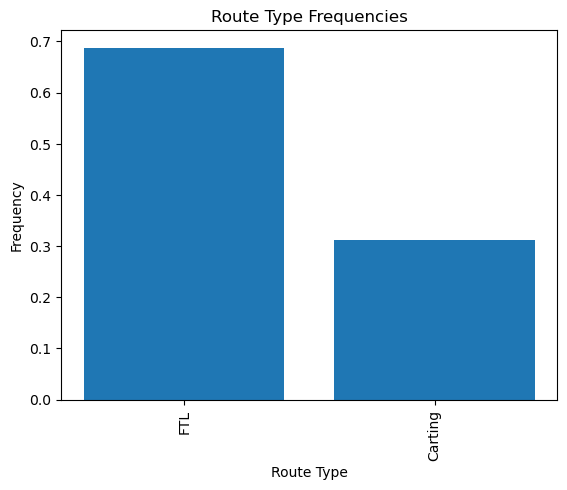

In [13]:
# Bar plot of the "route_type" column
route_type_counts = del_df['route_type'].value_counts(normalize = True)
plt.bar(route_type_counts.index, route_type_counts.values)
plt.xlabel('Route Type')
plt.ylabel('Frequency')
plt.title('Route Type Frequencies')
plt.xticks(rotation=90)
plt.show()

About 70% of the total trips are of "FTL" type. However, this might not give a correct picture, as this might contain multiple sub-journeys and each sub-journeys can have multiple segments. Univariate Analysis will be done post Feature Engineering.

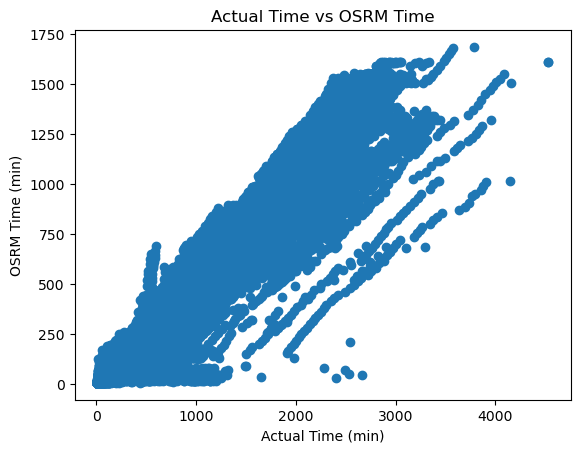

In [14]:
# Scatterplot of actual time vs OSRM time
plt.scatter(del_df['actual_time'], del_df['osrm_time'])
plt.xlabel('Actual Time (min)')
plt.ylabel('OSRM Time (min)')
plt.title('Actual Time vs OSRM Time')
plt.show()

There seems to be a linear realtionship between Actual Time and OSRM time

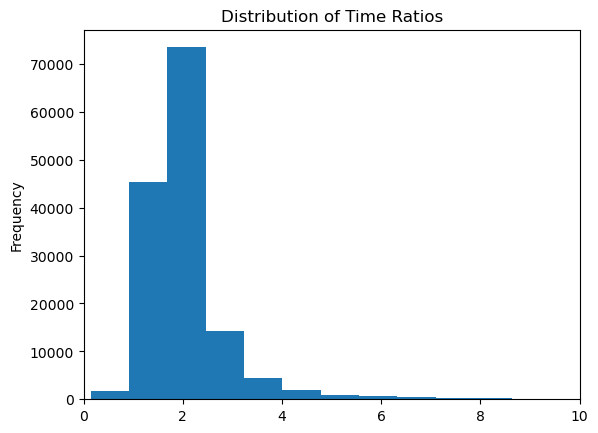

In [15]:
# Histogram of the "factor" column
plt.hist(del_df['factor'],bins=100)
plt.xlim(0,10)
plt.xlabel('')
plt.ylabel('Frequency')
plt.title('Distribution of Time Ratios')
plt.show()

Factor (Actual Time / OSRM Time) lies in the range of 1-2.5

More graphs are present in Section 2, post aggregating the data. EDA on raw data, post aggregating might give incorrect insights

## 2.Feature Engineering

### 2.1 Merging of rows and aggregation of fields & Feature Creation

##### There are 2 types of sub journeys we see in this dataset.
1. A->B->C : A trip consists of starting point as A and destination as C, via B. In this case, we would observe that the trip_id for all the 2 legs of the journey would be same. This can be aggregated using trip_id
2. Also One Leg of the Journey, can have multiple segments, which could possibly indicate travel between different points in the same route (E.g. Pickup point to Source Warehouse, Source Warehouse to Intransit warehouse etc.

<br>So in the first step, we should aggregate by trip_uuid,source_center & destination_center to aggregate entries for a single leg (sub journey), followed by aggregation by trip_uuid, which would aggregate at trip level. </br>

In [16]:
# Prepare a dictionary to aggregate different segments of the same subjourney
agg_sub_journey ={
    'data' : 'first',
    'trip_creation_time':'first',
    'route_type':'first',
    'trip_uuid':'first',
    
    'source_center':'first',
    'source_name':'first',
    
    'destination_center':'last',
    'destination_name':'last',
    
    'start_scan_to_end_scan':'last', #This remains same for a particular sub journey, so the first value is taken
    'od_start_time':'first',
    'od_end_time':'last',
    
    'actual_distance_to_destination':'last', #This is cumulative over all segments for a sub_journey,so last vale is taken
    'actual_time':'last',
    'osrm_time':'last',
    'osrm_distance':'last',
    'factor':'last', #This is basically actual_time/osrm_time, so the last value is taken
    
    'segment_actual_time':'sum', #This is for a particular segment,to get the total time for a sub_journey, it is added 
                                 #for all segments
    'segment_osrm_time':'sum',
    'segment_osrm_distance':'sum'
}

In [17]:
sub_journey_df = del_df.groupby(['trip_uuid','source_center','destination_center'])\
                                        .agg(agg_sub_journey)\
                                        .reset_index(drop=True)\
                                        .sort_values(by=['trip_uuid', 'od_end_time'], ascending=[True, True])

In [18]:
sub_journey_df.head()

,data,trip_creation_time,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,od_start_time,od_end_time,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance
1,training,2018-09-12 00:00:16.535741,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),999.0,2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,440.973689,830.0,388.0,544.8027,2.139175,820.0,474.0,649.8528
0,training,2018-09-12 00:00:16.535741,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),1260.0,2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,383.759164,732.0,329.0,446.5496,2.224924,728.0,534.0,670.6205
3,training,2018-09-12 00:00:22.886430,Carting,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),122.0,2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,48.542890,96.0,42.0,56.9116,2.285714,95.0,39.0,55.9899
2,training,2018-09-12 00:00:22.886430,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),58.0,2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,24.644021,47.0,26.0,28.1994,1.807692,46.0,26.0,28.1995
5,training,2018-09-12 00:00:33.691250,FTL,trip-153671043369099517,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),3099.0,2018-09-12 00:00:33.691250,2018-09-14 03:40:17.106733,1689.964663,2736.0,1528.0,2072.8556,1.790576,2700.0,1710.0,2227.5270


##### We need to segreggate the source centers and destination_centers into City,place,DC and state. This is done before aggreagting at trip level inorder to count the number of cities and States, a particular Truck has covered in the whole journey

In [19]:
def split_place_column(df,col):
    '''
    The number of underscores (_) is not fixed, so to avoid loss of information, we create columns on the basis of
    maximum number of splits, and then merge the extra columns
    '''
    if col == "source_name":
        prefix = 'source_'
    else:
        prefix = 'dest_'
    
    places = df[col].str.split("_", expand=True) #Split on basis of _
    max_parts = places.shape[1]
    places.columns = [prefix+'city',prefix+'place'] + [prefix+f'DC_{i}' for i in range(1, max_parts-1)] #Give Col Names
    
    for column in places.columns:
        places[column] = places[column].str.replace(r'\s*\(.*\)', '') #Remove the text in () after split
    
    df = pd.concat([df, places], axis=1)
    df[prefix+'state'] = df[col].str.extract(r'\((.*)\)') #Extract state
    return df

In [20]:
# split source_name and Destination_name column into separate city, place, DC and state columns
sub_journey_df = split_place_column(sub_journey_df,"source_name")
sub_journey_df = split_place_column(sub_journey_df,"destination_name")

C:\Users\shuklas\AppData\Local\Temp\ipykernel_38904\253578417.py:16: FutureWarning: The default value of regex will change from True to False in a future version.
  places[column] = places[column].str.replace(r'\s*\(.*\)', '') #Remove the text in () after split
C:\Users\shuklas\AppData\Local\Temp\ipykernel_38904\253578417.py:16: FutureWarning: The default value of regex will change from True to False in a future version.
  places[column] = places[column].str.replace(r'\s*\(.*\)', '') #Remove the text in () after split


In [21]:
sub_journey_df.head()

,data,trip_creation_time,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,od_start_time,...,source_city,source_place,source_DC_1,source_DC_2,source_state,dest_city,dest_place,dest_DC_1,dest_DC_2,dest_state
1,training,2018-09-12 00:00:16.535741,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),999.0,2018-09-12 00:00:16.535741,...,Bhopal,Trnsport,H,None,Madhya Pradesh,Kanpur,Central,H,6,Uttar Pradesh
0,training,2018-09-12 00:00:16.535741,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),1260.0,2018-09-12 16:39:46.858469,...,Kanpur,Central,H,6,Uttar Pradesh,Gurgaon,Bilaspur,HB,None,Haryana
3,training,2018-09-12 00:00:22.886430,Carting,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),122.0,2018-09-12 00:00:22.886430,...,Tumkur,Veersagr,I,None,Karnataka,Doddablpur,ChikaDPP,D,None,Karnataka
2,training,2018-09-12 00:00:22.886430,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),58.0,2018-09-12 02:03:09.655591,...,Doddablpur,ChikaDPP,D,None,Karnataka,Chikblapur,ShntiSgr,D,None,Karnataka
5,training,2018-09-12 00:00:33.691250,FTL,trip-153671043369099517,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),3099.0,2018-09-12 00:00:33.691250,...,Bangalore,Nelmngla,H,None,Karnataka,Gurgaon,Bilaspur,HB,None,Haryana


In [22]:
# Join DC_1 and DC_2 into DC
sub_journey_df['source_DC_2'].fillna('', inplace=True)
sub_journey_df['source_DC'] = sub_journey_df['source_DC_1'] + sub_journey_df['source_DC_2']

sub_journey_df['dest_DC_2'].fillna('', inplace=True)
sub_journey_df['dest_DC'] = sub_journey_df['dest_DC_1'] + sub_journey_df['dest_DC_2']

In [23]:
# Delete original Columns from which new features have been created
sub_journey_df.drop(['source_name','destination_name','source_DC_1','source_DC_2','dest_DC_1','dest_DC_2'], axis=1, inplace=True)

In [24]:
sub_journey_df.head()

,data,trip_creation_time,route_type,trip_uuid,source_center,destination_center,start_scan_to_end_scan,od_start_time,od_end_time,actual_distance_to_destination,...,segment_osrm_time,segment_osrm_distance,source_city,source_place,source_state,dest_city,dest_place,dest_state,source_DC,dest_DC
1,training,2018-09-12 00:00:16.535741,FTL,trip-153671041653548748,IND462022AAA,IND209304AAA,999.0,2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,440.973689,...,474.0,649.8528,Bhopal,Trnsport,Madhya Pradesh,Kanpur,Central,Uttar Pradesh,H,H6
0,training,2018-09-12 00:00:16.535741,FTL,trip-153671041653548748,IND209304AAA,IND000000ACB,1260.0,2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,383.759164,...,534.0,670.6205,Kanpur,Central,Uttar Pradesh,Gurgaon,Bilaspur,Haryana,H6,HB
3,training,2018-09-12 00:00:22.886430,Carting,trip-153671042288605164,IND572101AAA,IND561203AAB,122.0,2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,48.542890,...,39.0,55.9899,Tumkur,Veersagr,Karnataka,Doddablpur,ChikaDPP,Karnataka,I,D
2,training,2018-09-12 00:00:22.886430,Carting,trip-153671042288605164,IND561203AAB,IND562101AAA,58.0,2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,24.644021,...,26.0,28.1995,Doddablpur,ChikaDPP,Karnataka,Chikblapur,ShntiSgr,Karnataka,D,D
5,training,2018-09-12 00:00:33.691250,FTL,trip-153671043369099517,IND562132AAA,IND000000ACB,3099.0,2018-09-12 00:00:33.691250,2018-09-14 03:40:17.106733,1689.964663,...,1710.0,2227.5270,Bangalore,Nelmngla,Karnataka,Gurgaon,Bilaspur,Haryana,H,HB


In [25]:
# Bengaluru and Bangalore are same
sub_journey_df['source_city'] = sub_journey_df['source_city'].replace({'Bangalore': 'Bengaluru'})
sub_journey_df['dest_city'] = sub_journey_df['dest_city'].replace({'Bangalore': 'Bengaluru'})

In [26]:
# Create a new feature "Corridor" . This will be used later, to find the business routes
sub_journey_df['Corridor'] = sub_journey_df['source_city'] + '(' + sub_journey_df['source_state'] + ')'\
                            + sub_journey_df['dest_city'] + '(' + sub_journey_df['dest_state'] + ')'


In [27]:
# Get the total number of cities and states covered in a single trip
cities = sub_journey_df.groupby(['trip_uuid'])['source_city'].apply(set).reset_index()
cities['city_count'] = cities['source_city'].apply(lambda x:len(x))
del cities['source_city']

states = sub_journey_df.groupby(['trip_uuid'])['source_state'].apply(set).reset_index()
states['states_count'] = states['source_state'].apply(lambda x:len(x))
del states['source_state']

In [28]:
# split source_name and Destination_name column into separate city, place, DC and state columns
#sub_journey_df[['source_city', 'source_place', 'source_DC', 'source_state']] = sub_journey_df['source_name'].str.extract(r'(\w+)_(\w+)_(\w+) \((\w+)\)')
#sub_journey_df[['dest_city', 'dest_place', 'dest_DC', 'dest_state']] = sub_journey_df['destination_name'].str.extract(r'(\w+)_(\w+)_(\w+) \((\w+)\)')

In [29]:
# Merge cities and states dataframe with sub_journey_df
sub_journey_df_new = sub_journey_df.merge(cities, on=['trip_uuid']).merge(states, on=['trip_uuid'])

In [30]:
sub_journey_df_new.head()

,data,trip_creation_time,route_type,trip_uuid,source_center,destination_center,start_scan_to_end_scan,od_start_time,od_end_time,actual_distance_to_destination,...,source_place,source_state,dest_city,dest_place,dest_state,source_DC,dest_DC,Corridor,city_count,states_count
0,training,2018-09-12 00:00:16.535741,FTL,trip-153671041653548748,IND462022AAA,IND209304AAA,999.0,2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,440.973689,...,Trnsport,Madhya Pradesh,Kanpur,Central,Uttar Pradesh,H,H6,Bhopal(Madhya Pradesh)Kanpur(Uttar Pradesh),2,2
1,training,2018-09-12 00:00:16.535741,FTL,trip-153671041653548748,IND209304AAA,IND000000ACB,1260.0,2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,383.759164,...,Central,Uttar Pradesh,Gurgaon,Bilaspur,Haryana,H6,HB,Kanpur(Uttar Pradesh)Gurgaon(Haryana),2,2
2,training,2018-09-12 00:00:22.886430,Carting,trip-153671042288605164,IND572101AAA,IND561203AAB,122.0,2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,48.542890,...,Veersagr,Karnataka,Doddablpur,ChikaDPP,Karnataka,I,D,Tumkur(Karnataka)Doddablpur(Karnataka),2,1
3,training,2018-09-12 00:00:22.886430,Carting,trip-153671042288605164,IND561203AAB,IND562101AAA,58.0,2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,24.644021,...,ChikaDPP,Karnataka,Chikblapur,ShntiSgr,Karnataka,D,D,Doddablpur(Karnataka)Chikblapur(Karnataka),2,1
4,training,2018-09-12 00:00:33.691250,FTL,trip-153671043369099517,IND562132AAA,IND000000ACB,3099.0,2018-09-12 00:00:33.691250,2018-09-14 03:40:17.106733,1689.964663,...,Nelmngla,Karnataka,Gurgaon,Bilaspur,Haryana,H,HB,Bengaluru(Karnataka)Gurgaon(Haryana),2,2


In [31]:
# Prepare a dictionary to aggregate different sub-journeys of the same trip
agg_trip ={
    'data' : 'first',
    'trip_creation_time':'first',
    'route_type':'first',
    'trip_uuid':'first',
    
    'source_center':'first',
    'source_city':'first',
    'source_place':'first',
    'source_DC':'first',
    'source_state':'first',
    'city_count':'first',
    'states_count':'first',
    
    
    'destination_center':'last',
    'dest_city':'last',
    'dest_place':'last',
    'dest_DC':'last',
    'dest_state':'last',
    
    'start_scan_to_end_scan':'sum', #This needs to be added for all sub journeys of a trip.
    'od_start_time':'first',
    'od_end_time':'last',
    
    'actual_distance_to_destination':'sum', #This needs to be added for all sub journeys of a trip.
    'actual_time':'sum', #This is for a particular sub-journey,to get the total time for a trip, it is added for all sub-journey
    'osrm_time':'sum',
    'osrm_distance':'sum',
    
    'segment_actual_time':'sum', # To get the total time for a trip, it is added over all subjourneys
    'segment_osrm_time':'sum',
    'segment_osrm_distance':'sum'
}

In [32]:
trip_df = sub_journey_df_new.groupby(['trip_uuid']).agg(agg_trip).reset_index(drop=True)

In [33]:
# Checking the dimensions of aggregated dataset
print("Rows : {} ,Columns : {}".format(trip_df.shape[0],trip_df.shape[1]))

Rows : 14817 ,Columns : 26


In [34]:
trip_df.info() #Display Details of the aggregated dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14817 entries, 0 to 14816
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   data                            14817 non-null  object        
 1   trip_creation_time              14817 non-null  datetime64[ns]
 2   route_type                      14817 non-null  object        
 3   trip_uuid                       14817 non-null  object        
 4   source_center                   14817 non-null  object        
 5   source_city                     14807 non-null  object        
 6   source_place                    14297 non-null  object        
 7   source_DC                       13580 non-null  object        
 8   source_state                    14807 non-null  object        
 9   city_count                      14817 non-null  int64         
 10  states_count                    14817 non-null  int64         
 11  de

### 2.2 Feature Creation on aggregated Data (grouped by Trip_id)

In [35]:
# Calculate the time taken between od_start_time and od_end_time
trip_df['od_time_diff'] = (trip_df['od_end_time'] - trip_df['od_start_time']).dt.total_seconds() / 60

In [36]:
# Extract features from trip_creation_time column
trip_df['trip_creation_month'] = trip_df['trip_creation_time'].dt.month
trip_df['trip_creation_year'] = trip_df['trip_creation_time'].dt.year
trip_df['trip_creation_day'] = trip_df['trip_creation_time'].dt.day

In [37]:
# Delete original Columns from which new features have been created
trip_df.drop(['trip_creation_time','od_start_time', 'od_end_time'], axis=1, inplace=True)

In [38]:
# Create Factor and Segment Factor that was dropped while aggregating the dataset
trip_df['Factor'] = trip_df['actual_time']/trip_df['osrm_time']
trip_df['Segment_factor'] = trip_df['segment_actual_time']/trip_df['segment_osrm_time']

In [39]:
trip_df.head()

,data,route_type,trip_uuid,source_center,source_city,source_place,source_DC,source_state,city_count,states_count,...,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,od_time_diff,trip_creation_month,trip_creation_year,trip_creation_day,Factor,Segment_factor
0,training,FTL,trip-153671041653548748,IND462022AAA,Bhopal,Trnsport,H,Madhya Pradesh,2,2,...,991.3523,1548.0,1008.0,1320.4733,2260.109800,9,2018,12,2.178522,1.535714
1,training,Carting,trip-153671042288605164,IND572101AAA,Tumkur,Veersagr,I,Karnataka,2,1,...,85.1110,141.0,65.0,84.1894,181.611874,9,2018,12,2.102941,2.169231
2,training,FTL,trip-153671043369099517,IND562132AAA,Bengaluru,Nelmngla,H,Karnataka,2,2,...,2354.0665,3308.0,1941.0,2545.2678,3934.362520,9,2018,12,1.923563,1.704276
3,training,Carting,trip-153671046011330457,IND400072AAB,Mumbai Hub,None,None,Maharashtra,1,1,...,19.6800,59.0,16.0,19.8766,100.494935,9,2018,12,3.933333,3.687500
4,training,FTL,trip-153671052974046625,IND583101AAA,Bellary,Dc,D,Karnataka,3,1,...,146.7918,340.0,115.0,146.7919,718.349042,9,2018,12,2.914530,2.956522


#### Consider a case in which a truck makes a round trip, in this case City and State Counts are correct, but if it is not a round trip, then the final destination is excluded from the count.The function below gives the actual count

In [40]:
def update_row(row):
    '''
    Checks if it is a round trip, in this case City and State Counts are correct, but if it is not a round trip, 
    then the final destination is excluded from the count.The function below gives the actual count.
    '''
    
    if ((row['source_city'] != row['dest_city']) and not(pd.isna(row['source_city'])) and not(pd.isna(row['dest_city']))):
        row['city_count'] += 1
    
    if ((row['source_state'] != row['dest_state']) and not(pd.isna(row['source_state'])) and not(pd.isna(row['dest_state']))):
        row['states_count'] += 1
    return row

In [41]:
# Apply the above function to correct cities and states covered
trip_df = trip_df.apply(update_row, axis=1)

In [42]:
trip_df.head()

,data,route_type,trip_uuid,source_center,source_city,source_place,source_DC,source_state,city_count,states_count,...,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,od_time_diff,trip_creation_month,trip_creation_year,trip_creation_day,Factor,Segment_factor
0,training,FTL,trip-153671041653548748,IND462022AAA,Bhopal,Trnsport,H,Madhya Pradesh,3,3,...,991.3523,1548.0,1008.0,1320.4733,2260.109800,9,2018,12,2.178522,1.535714
1,training,Carting,trip-153671042288605164,IND572101AAA,Tumkur,Veersagr,I,Karnataka,3,1,...,85.1110,141.0,65.0,84.1894,181.611874,9,2018,12,2.102941,2.169231
2,training,FTL,trip-153671043369099517,IND562132AAA,Bengaluru,Nelmngla,H,Karnataka,3,3,...,2354.0665,3308.0,1941.0,2545.2678,3934.362520,9,2018,12,1.923563,1.704276
3,training,Carting,trip-153671046011330457,IND400072AAB,Mumbai Hub,None,None,Maharashtra,2,1,...,19.6800,59.0,16.0,19.8766,100.494935,9,2018,12,3.933333,3.687500
4,training,FTL,trip-153671052974046625,IND583101AAA,Bellary,Dc,D,Karnataka,3,1,...,146.7918,340.0,115.0,146.7919,718.349042,9,2018,12,2.914530,2.956522


#### 2.2.1 Univariate Analysis of Aggregated Data

In [43]:
#Summarizing the number of unique values in each column
cat_cols = [ele for ele in trip_df.select_dtypes(include=['object']).columns if ele not in ['trip_uuid','data']] #Categorical Columns
unique_counts=pd.DataFrame.from_records([(col,trip_df[col].nunique()) for col in cat_cols],columns=['Column_Name','Num_Unique'])
unique_counts.sort_values(by='Num_Unique')

,Column_Name,Num_Unique
0,route_type,2
5,source_state,29
10,dest_state,32
4,source_DC,45
9,dest_DC,48
3,source_place,645
2,source_city,672
8,dest_place,723
7,dest_city,766
1,source_center,868


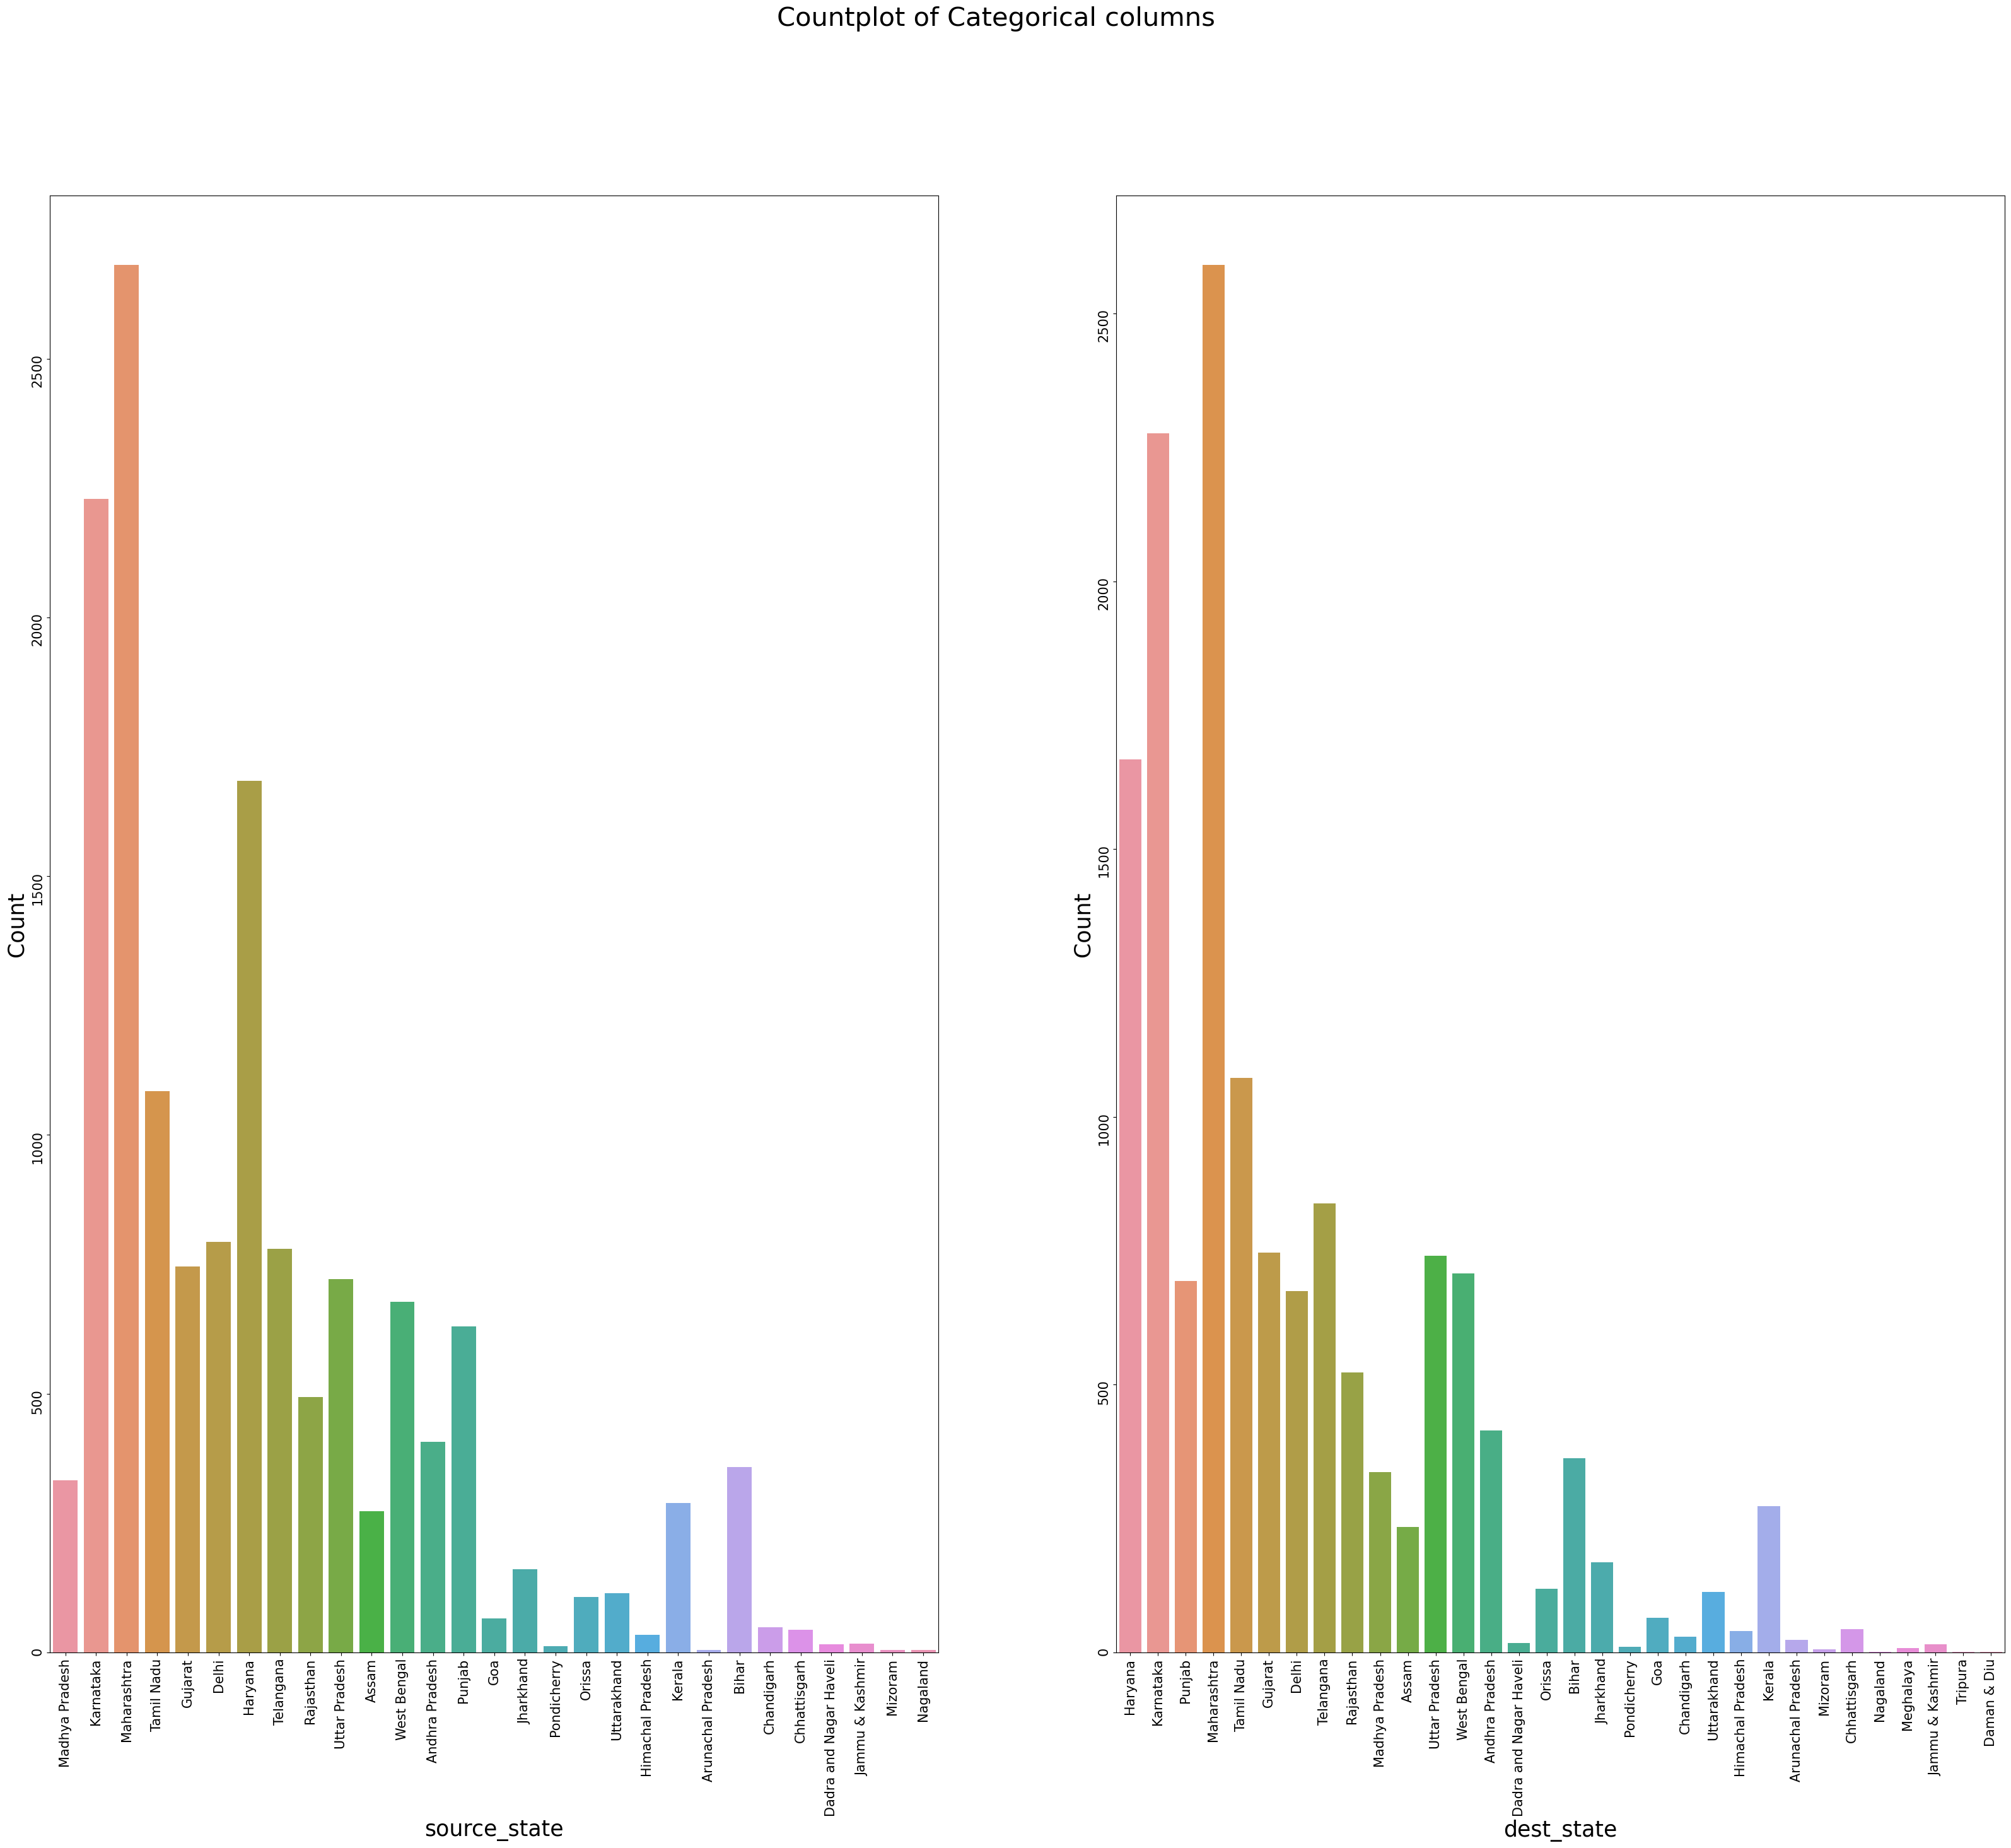

In [44]:
cat_cols_filtered = ['source_state','dest_state']
cat_columns_len = len(cat_cols_filtered) #Length of categorical columns
plt.rcParams['figure.figsize'] = (40, 30)
fig, axs = plt.subplots(int(round(cat_columns_len/2,0)), 2) # Create subplots

for i,col in enumerate(cat_cols_filtered): #Iterate through each categorical column
    sns.countplot(data=trip_df, x=col, ax=axs[i])
    axs[i].set_xlabel(col,fontsize=25)
    axs[i].set_ylabel("Count",fontsize=25)
    axs[i].tick_params(labelsize=15,rotation=90)
    #axs[i//2,i%2].set_facecolor("grey")

fig.suptitle('Countplot of Categorical columns', fontsize=30)
plt.show()

In [45]:
# get the top 5 most frequent values in column 'source_city' and 'dest_city'
print(trip_df['source_city'].value_counts(normalize = True).head(5))
print(trip_df['dest_city'].value_counts(normalize = True).head(5))

Bengaluru    0.119538
Gurgaon      0.069156
Bhiwandi     0.054771
Delhi        0.041872
Mumbai       0.039103
Name: source_city, dtype: float64
Bengaluru    0.114930
Mumbai       0.060166
Gurgaon      0.058681
Hyderabad    0.042542
Bhiwandi     0.040786
Name: dest_city, dtype: float64


In [46]:
# get the top 5 most frequent values in column 'Corridor'
print(sub_journey_df['Corridor'].value_counts(normalize = True).head(5))

Bengaluru(Karnataka)Bengaluru(Karnataka)    0.053886
Bhiwandi(Maharashtra)Mumbai(Maharashtra)    0.015521
Hyderabad(Telangana)Hyderabad(Telangana)    0.012051
Mumbai(Maharashtra)Mumbai(Maharashtra)      0.010907
Mumbai(Maharashtra)Bhiwandi(Maharashtra)    0.010754
Name: Corridor, dtype: float64


#### Insights from Univariate Analysis of Categorical Variables
======================
1. Maharashtra is the state where maximum number of trips start and end, followed by Karnataka and Haryana
2. Almost 12% of trips originate from Bengaluru, followed by Gurgaon and Bhiwandi
3. Almost 11.5% of trips end at Bengaluru followed by Mumbai and Gurgaon
4. Bhiwandi -Mumbai is the busiest corridor, though maximum number of trips happen within Bengaluru city

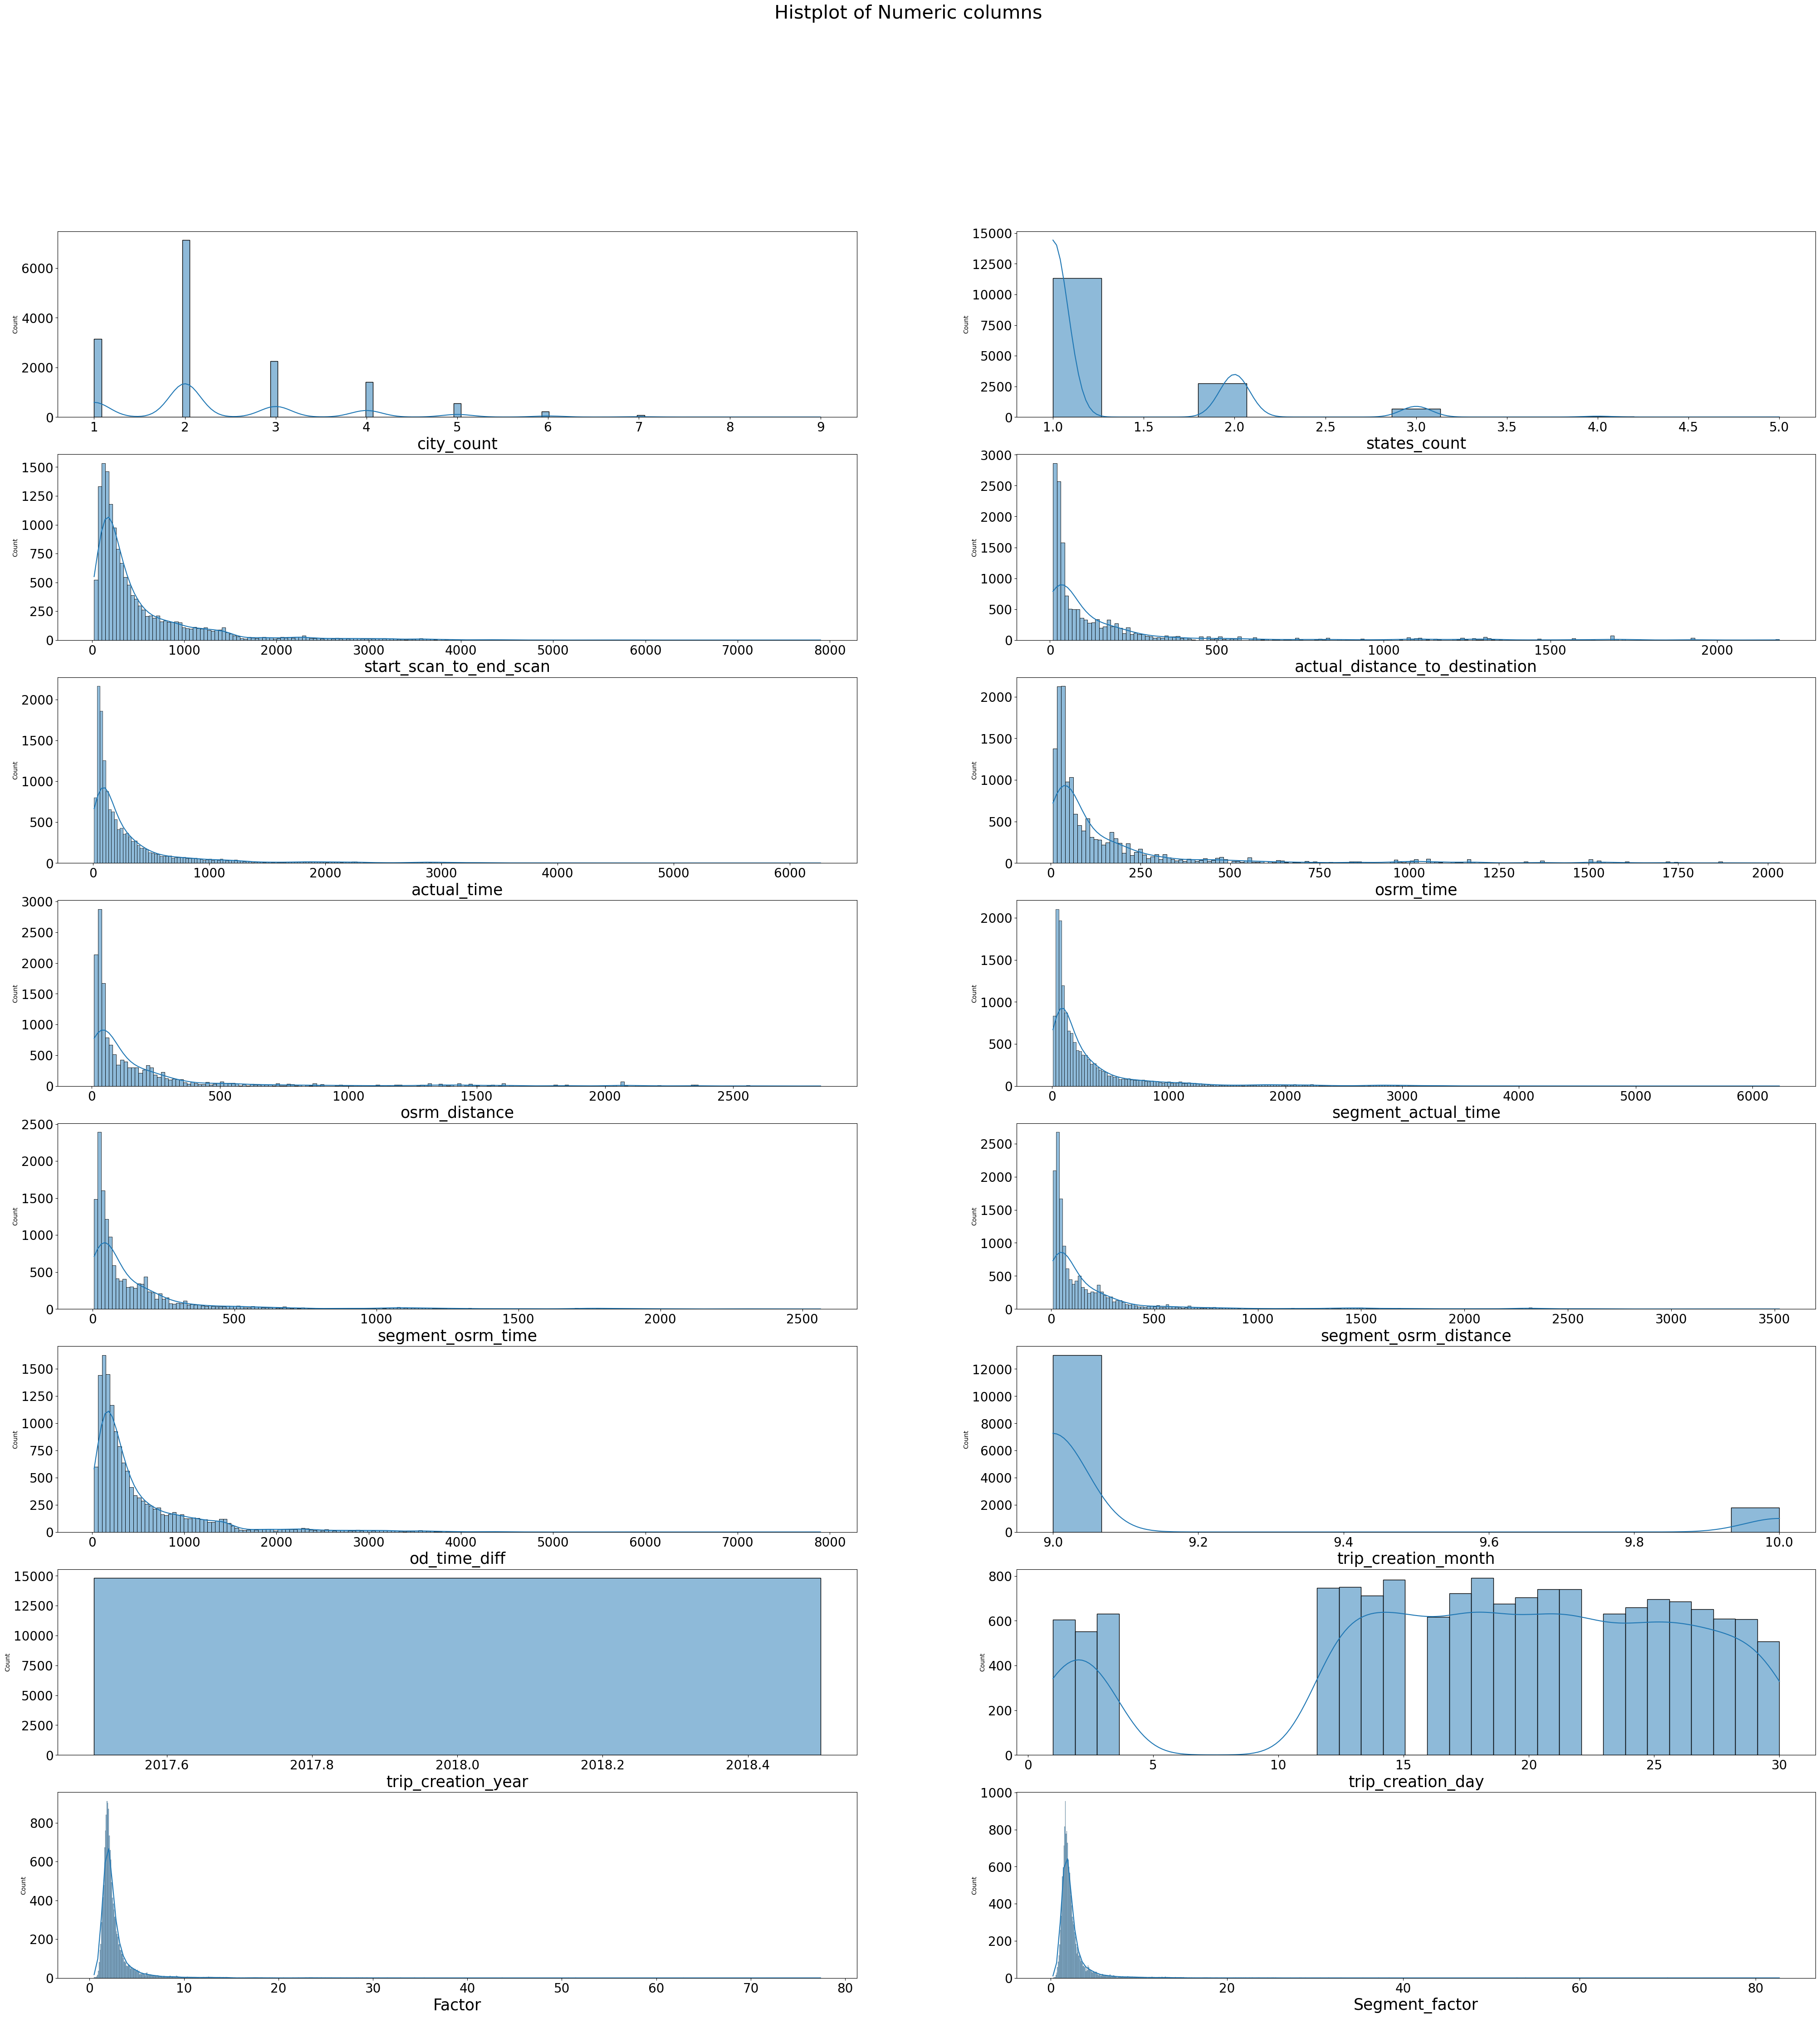

In [47]:
num_columns = [ele for ele in trip_df.select_dtypes(include=['int','float']).columns] #Numerical Columns
num_columns_len = len(num_columns) 

plt.rcParams['figure.figsize'] = (50, 50)
fig, axs = plt.subplots(int(round(num_columns_len/2,0)), 2) # Create subplots

for i,col in enumerate(num_columns):
    sns.histplot(data=trip_df, x=col, kde = True, ax=axs[i//2,i%2])
    axs[i//2,i%2].set_xlabel(col,fontsize=25)
    axs[i//2,i%2].set_ylabel("Count",fontsize=10)
    axs[i//2,i%2].tick_params(labelsize=20)
    #axs[i//2,i%2].set_facecolor("grey")

fig.suptitle('Histplot of Numeric columns', fontsize=30)
plt.show()

#### Observations on Distribution of Numerical Columns
===========================================

1. Most of the numerical columns are left skewed, and have a lognormal distribution have a lognormal distribution.
2. Most of the trips span 2 cities.
3. Most of trips happen within a state. 
4. Strangely, there are no record for trips between 5th and 10th of a month.
5. Most of the trips are short distance trips, with actual distance less than 30 kms
6. Most trips are around 120-150 mins long
5. Factor, which is Actual Distance/OSRM Distance lies in the range 1-2.5

#### 2.2.2 Biivariate Analysis of Aggregated Data

C:\Users\shuklas\AppData\Local\Temp\ipykernel_38904\1239209854.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(trip_df.corr(), annot=True)


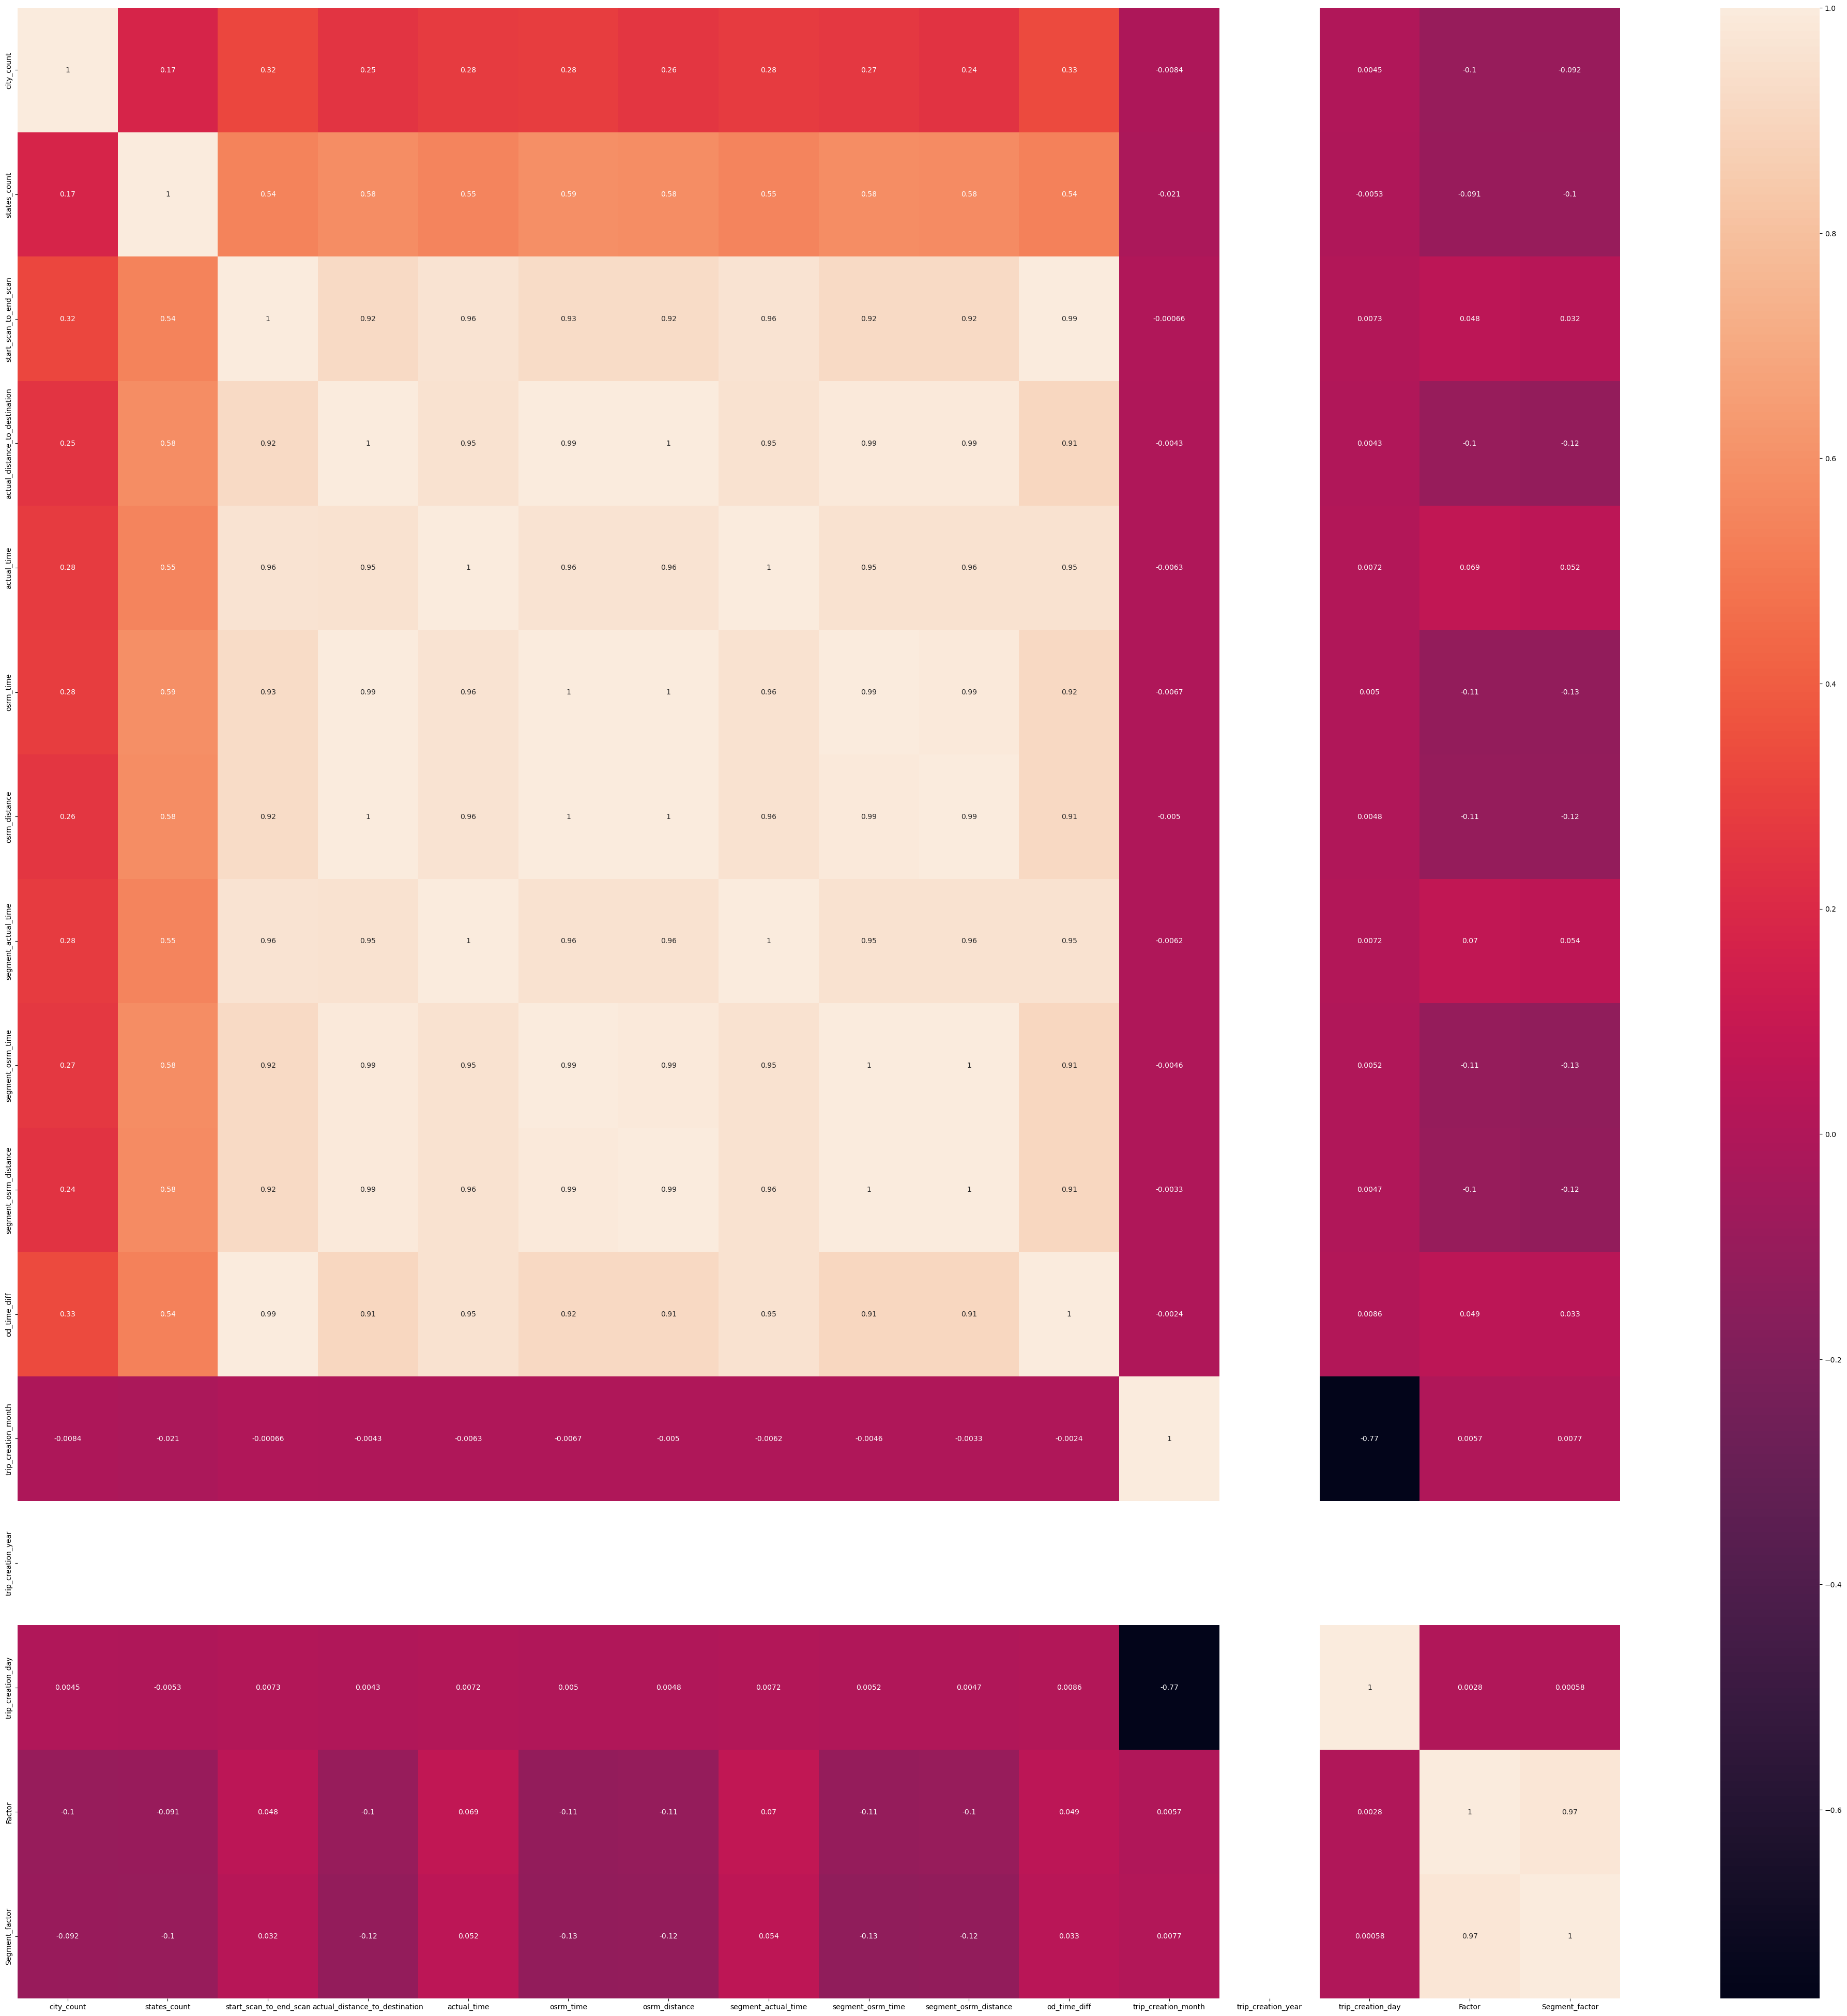

In [48]:
sns.heatmap(trip_df.corr(), annot=True)
plt.show()

###### Distance and Time fields seem to be highly correlated. Hypothesis Testing can confirm whether the correlation is significant or not

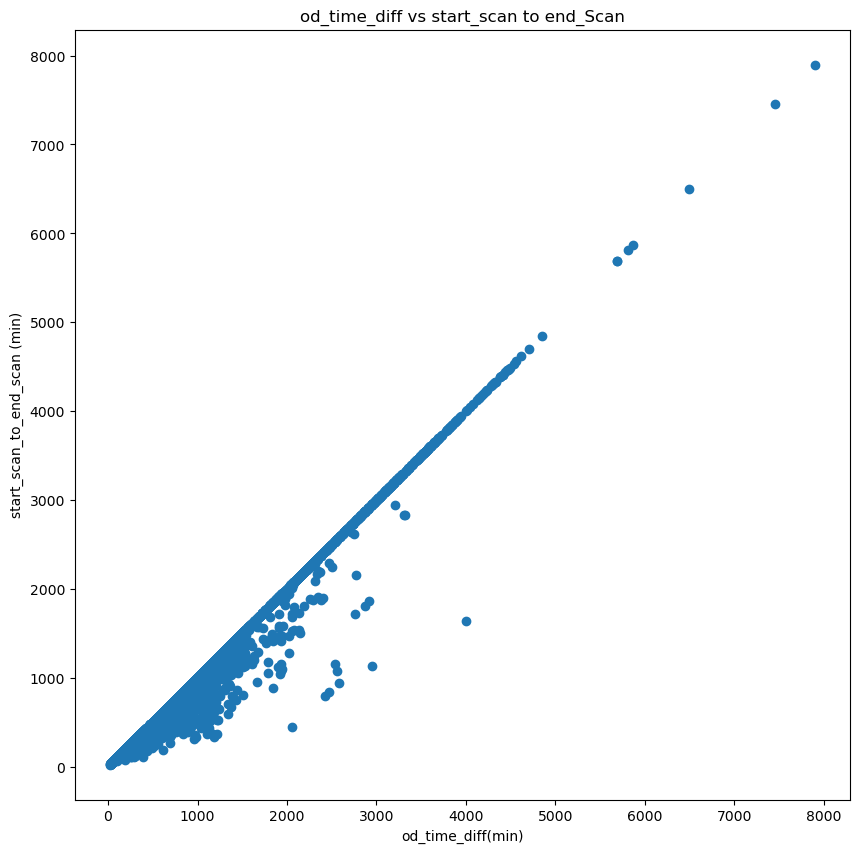

In [49]:
# Scatterplot of od_time_diff vs start_scan_to_end_scan
plt.rcParams['figure.figsize'] = (10, 10)
plt.scatter(trip_df['od_time_diff'], trip_df['start_scan_to_end_scan'])
plt.xlabel('od_time_diff(min)')
plt.ylabel('start_scan_to_end_scan (min)')
plt.title('od_time_diff vs start_scan to end_Scan')
plt.show()

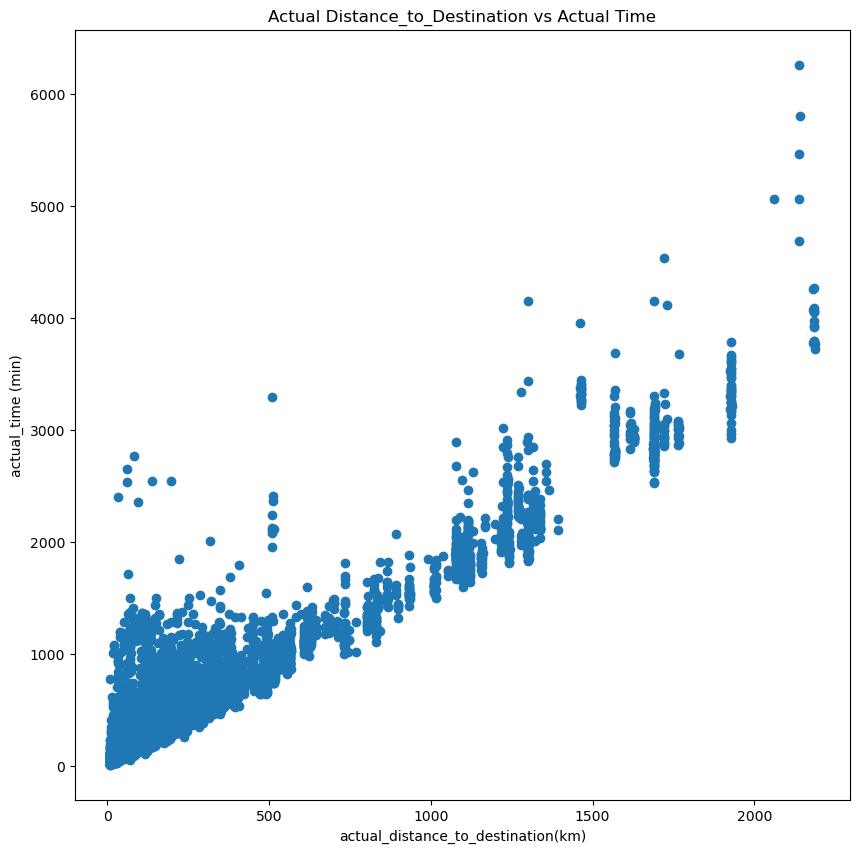

In [50]:
# Scatterplot of Actual Distance vs Actual Time
plt.rcParams['figure.figsize'] = (10, 10)
plt.scatter(trip_df['actual_distance_to_destination'], trip_df['actual_time'])
plt.xlabel('actual_distance_to_destination(km)')
plt.ylabel('actual_time (min)')
plt.title('Actual Distance_to_Destination vs Actual Time')
plt.show()

There is an almost linear relationship between actual_time and actual_distance_to_destination for distances less than 500 kms. Post 500kms, there's a lot of variance in the time taken

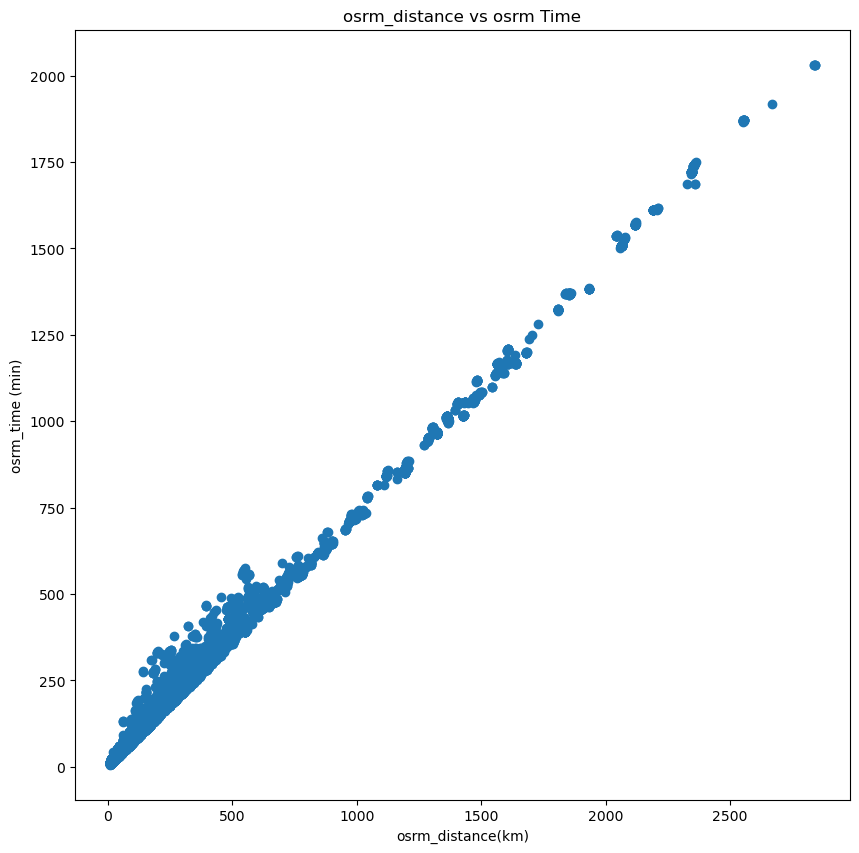

In [51]:
# Scatterplot of OSRM Distance vs OSRM Time
plt.rcParams['figure.figsize'] = (10, 10)
plt.scatter(trip_df['osrm_distance'], trip_df['osrm_time'])
plt.xlabel('osrm_distance(km)')
plt.ylabel('osrm_time (min)')
plt.title('osrm_distance vs osrm Time')
plt.show()

There is an almost perfect linear relationship between osrm_time and osrm_distance. Since these fields are generated by OSRM device, a linear relation is justified

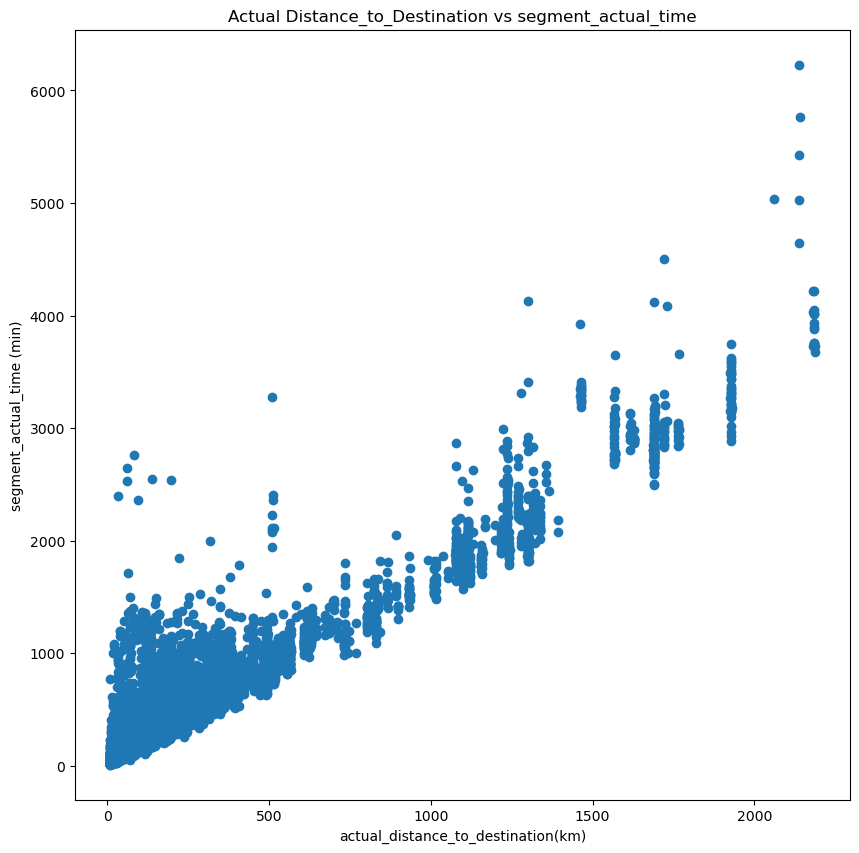

In [52]:
# Scatterplot of Actual Distance vs Segment Actual Time
plt.rcParams['figure.figsize'] = (10, 10)
plt.scatter(trip_df['actual_distance_to_destination'], trip_df['segment_actual_time'])
plt.xlabel('actual_distance_to_destination(km)')
plt.ylabel('segment_actual_time (min)')
plt.title('Actual Distance_to_Destination vs segment_actual_time')
plt.show()

There is an almost linear relationship between actual_time and actual_distance_to_destination for distances less than 500 kms. Post 500kms, there's a lot of variance in the time taken. This is too similar to Actual distance vs actual_time_graph

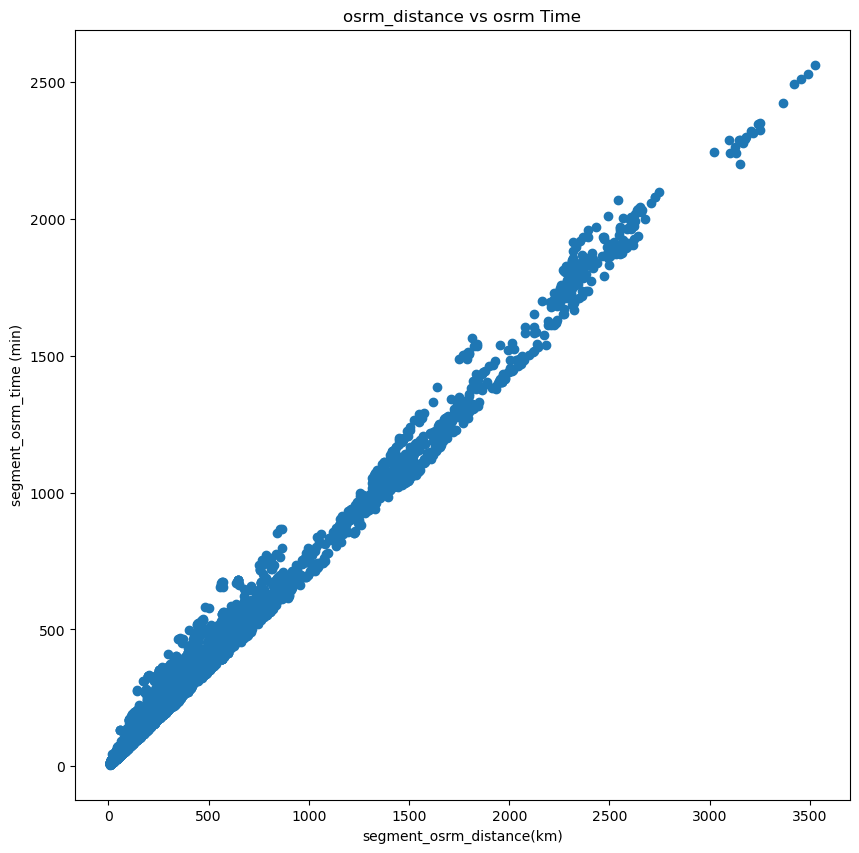

In [53]:
# Scatterplot of Segment OSRM Distance vs Segment OSRM Time
plt.rcParams['figure.figsize'] = (10, 10)
plt.scatter(trip_df['segment_osrm_distance'], trip_df['segment_osrm_time'])
plt.xlabel('segment_osrm_distance(km)')
plt.ylabel('segment_osrm_time (min)')
plt.title('osrm_distance vs osrm Time')
plt.show()

There is an almost perfect linear relationship between segment_osrm_time and segment_osrm_distance. Since these fields are generated by OSRM device, a linear relation is justified

##### Corridor Analysis

In [54]:
# Corridor Analysis
corridor_dict ={
    'Corridor':'first',
    'segment_actual_time':'mean', #This is for a particular segment,to get the total time for a sub_journey, it is added 
                                 #for all segments
    'actual_distance_to_destination':'mean',
    'segment_osrm_time':'mean',
    'segment_osrm_distance':'mean'
}

corridor_df = sub_journey_df_new.groupby(['Corridor']).agg(corridor_dict).reset_index(drop=True)

In [55]:
# Top 5 longest corridors by time taken
corridor_df.sort_values(by=['segment_actual_time'], ascending=[False]).head(5)

,Corridor,segment_actual_time,actual_distance_to_destination,segment_osrm_time,segment_osrm_distance
439,Chandigarh(Punjab)Bengaluru(Karnataka),3751.000000,1927.447705,1864.000000,2500.214500
831,Guwahati(Assam)Delhi(Delhi),3341.764706,1463.115839,1677.705882,2300.517159
565,Delhi(Delhi)Guwahati(Assam),3281.000000,1461.480857,1541.000000,2181.460700
1240,Kolkata(West Bengal)Bhiwandi(Maharashtra),3141.200000,1628.663803,1720.800000,2363.329580
814,Gurgaon(Haryana)MAA(Tamil Nadu),3090.857143,1721.280753,1767.071429,2361.555264


In [56]:
# Top 5 longest corridors by Distance
corridor_df.sort_values(by=['actual_distance_to_destination'], ascending=[False]).head(5)

,Corridor,segment_actual_time,actual_distance_to_destination,segment_osrm_time,segment_osrm_distance
439,Chandigarh(Punjab)Bengaluru(Karnataka),3751.000000,1927.447705,1864.000000,2500.214500
814,Gurgaon(Haryana)MAA(Tamil Nadu),3090.857143,1721.280753,1767.071429,2361.555264
790,Gurgaon(Haryana)Bengaluru(Karnataka),2864.136364,1689.772879,1739.075758,2288.400620
245,Bengaluru(Karnataka)Gurgaon(Haryana),2764.600000,1689.623501,1786.866667,2312.468442
323,Bhiwandi(Maharashtra)Kolkata(West Bengal),2902.000000,1628.807438,1898.444444,2584.622933


In [57]:
value_counts = sub_journey_df['Corridor'].value_counts(normalize=True)
df = pd.DataFrame({'Corridor': value_counts.index, 'normalized_count': value_counts.values})
corridor_df = corridor_df.merge(df, on=['Corridor'])

# Top 5 longest corridors by Maximum number of trips
corridor_df.sort_values(by=['normalized_count'], ascending=[False]).head(5)

,Corridor,segment_actual_time,actual_distance_to_destination,segment_osrm_time,segment_osrm_distance,normalized_count
237,Bengaluru(Karnataka)Bengaluru(Karnataka),80.688606,28.428735,45.563340,42.056893,0.053886
326,Bhiwandi(Maharashtra)Mumbai(Maharashtra),79.538084,22.560310,25.570025,31.490175,0.015521
937,Hyderabad(Telangana)Hyderabad(Telangana),101.506329,24.610768,34.598101,40.268480,0.012051
1512,Mumbai(Maharashtra)Mumbai(Maharashtra),54.171329,11.825905,14.737762,17.854490,0.010907
1508,Mumbai(Maharashtra)Bhiwandi(Maharashtra),93.340426,21.331463,24.893617,29.644733,0.010754


#### Corridor Analysis
======================

1. Bengaluru-Bengaluru Corridor is the busiest, there are many packages transferred within Bengaluru, accounts for 5% of the total trips. The actual time is around 80 mins and distance is around 28 kms
2. Chandigarh-Bengaluru Corridor is the longest corridor and takes the maximum time

### 2.3 Handling Missing Values

In [58]:
# New features have been created and aggregation has been done, checking nulls again
(trip_df.isna().sum()/len(trip_df))*100

data                              0.000000
route_type                        0.000000
trip_uuid                         0.000000
source_center                     0.000000
source_city                       0.067490
source_place                      3.509482
source_DC                         8.348519
source_state                      0.067490
city_count                        0.000000
states_count                      0.000000
destination_center                0.000000
dest_city                         0.053992
dest_place                        4.265371
dest_DC                           8.712965
dest_state                        0.053992
start_scan_to_end_scan            0.000000
actual_distance_to_destination    0.000000
actual_time                       0.000000
osrm_time                         0.000000
osrm_distance                     0.000000
segment_actual_time               0.000000
segment_osrm_time                 0.000000
segment_osrm_distance             0.000000
od_time_dif

#### Analysis of Missing Values
=======================
1. Source_city,Source_state, Destination_city and Destination state have less than 1% missing values. This can be removed from further analysis. Filling with Mode won't make sense, because the trip_ids are different, and this will introduce incorrect data
2. The number of missing values are high in source_place,source_DC, dest_place and dest_DC. These are not much important for analysis, so will fill these with the string "Unknown_place","Unknown_DC" respectively

In [59]:
# remove missing values from column 'source_city','source_state','dest_city','dest_state' only
df_clean = trip_df.dropna(subset=['source_city','source_state','dest_city','dest_state'])
df_clean['source_place'].fillna('unknown_src_plc', inplace=True)
df_clean['source_DC'].fillna('unknown_src_DC', inplace=True)
df_clean['dest_place'].fillna('unknown_dest_plc', inplace=True)
df_clean['dest_DC'].fillna('unknown_dest_DC', inplace=True)

C:\Users\shuklas\AppData\Local\Temp\ipykernel_38904\266607466.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['source_place'].fillna('unknown_src_plc', inplace=True)
C:\Users\shuklas\AppData\Local\Temp\ipykernel_38904\266607466.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['source_DC'].fillna('unknown_src_DC', inplace=True)
C:\Users\shuklas\AppData\Local\Temp\ipykernel_38904\266607466.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

In [60]:
# Checking the dimensions of dataset
print("Rows : {} ,Columns : {}".format(df_clean.shape[0],df_clean.shape[1]))

Rows : 14800 ,Columns : 29


Only 17 rows have been removed

### 2.4 Handling Outliers

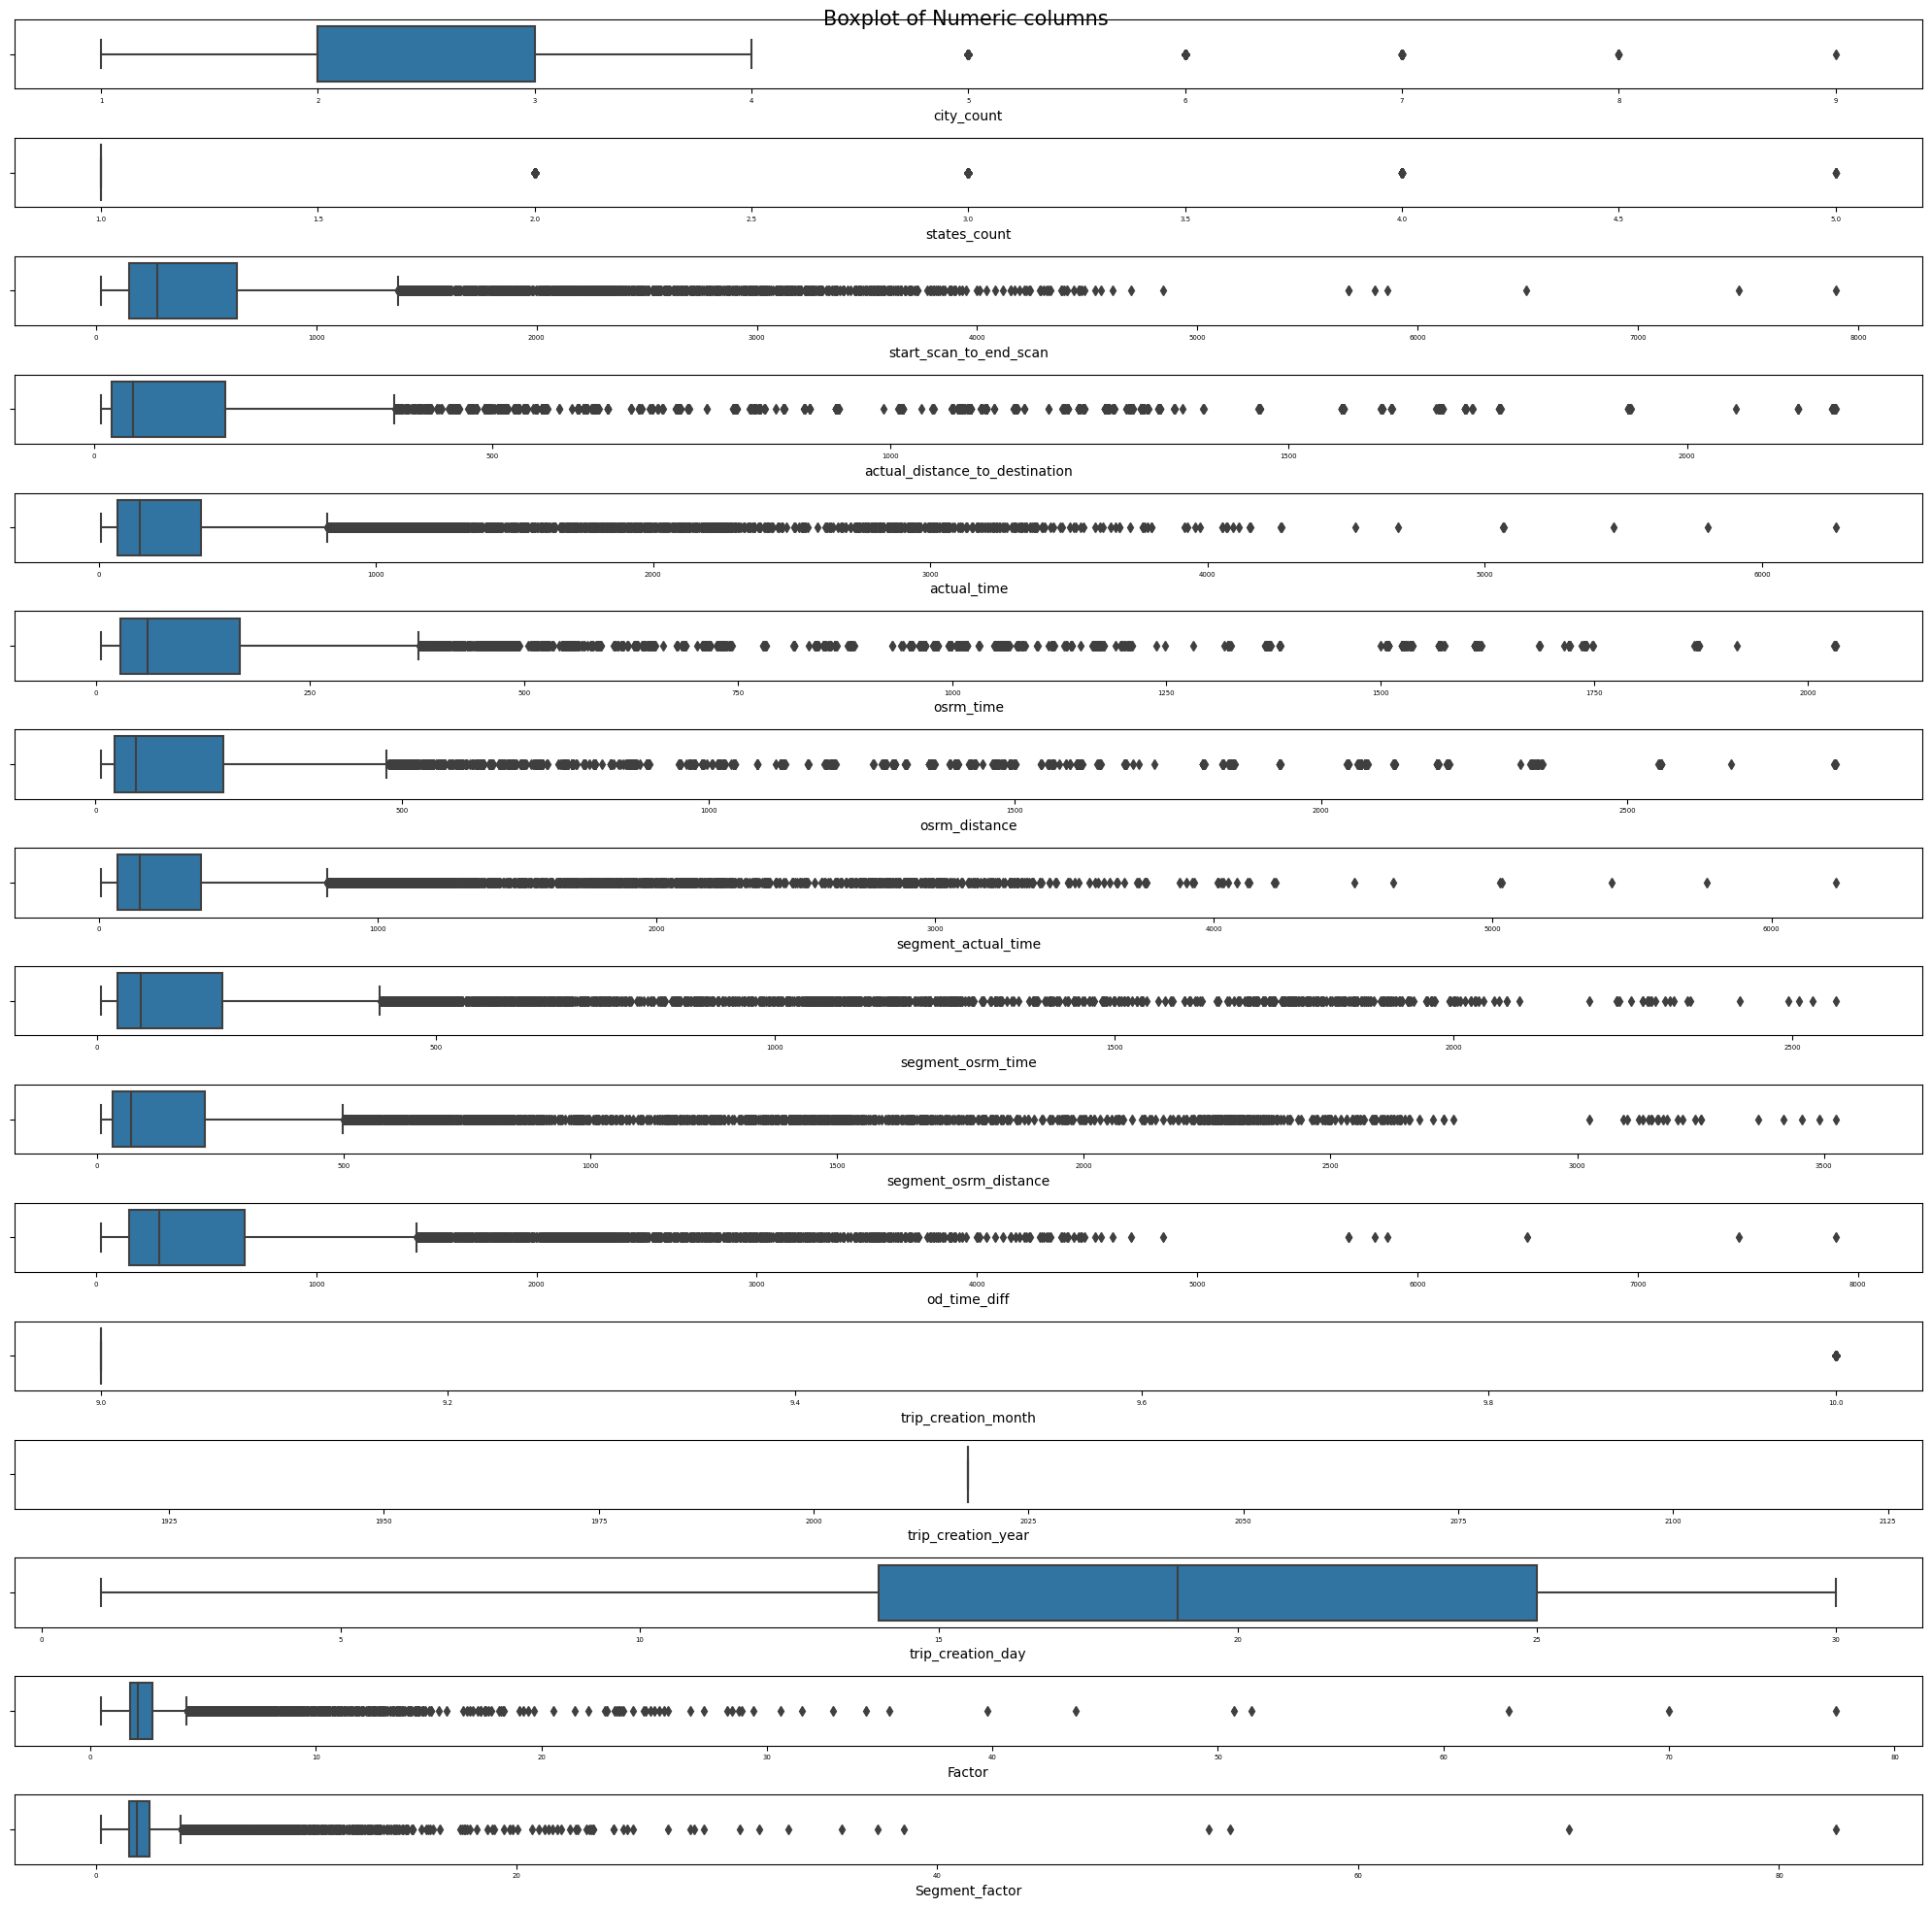

In [61]:
plt.figure(figsize=(20, 20))
for i, col in enumerate(num_columns):
    plt.subplot(num_columns_len, 1, i+1)
    sns.boxplot(data=df_clean, x=col)
    plt.xlabel(col, fontsize=10)
    plt.tick_params(labelsize=5)
plt.suptitle('Boxplot of Numeric columns', fontsize=15)
plt.tight_layout()
plt.show()

In [62]:
num_col_list = [ i for i in num_columns if i not in ['trip_creation_year','trip_creation_day','city_count','states_count','trip_creation_month'] ]
df = df_clean[num_col_list] #Create a df with only numerical columns

# Calculate the upper and lower bounds for outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

# Determine the number of outliers for each column
outlier_counts = np.zeros(df.shape[1])
for i in range(df.shape[1]):
    column = df.iloc[:, i]
    outlier_counts[i] = np.sum((column < lower_bound[i]) | (column > upper_bound[i]))

# Create the dataframe with the percentage of outliers
df_outliers = pd.DataFrame({'Column': df.columns,
                            'Outlier Percentage': np.round(100 * outlier_counts / df.shape[0],2)})

df_outliers

,Column,Outlier Percentage
0,start_scan_to_end_scan,8.52
1,actual_distance_to_destination,9.79
2,actual_time,11.09
3,osrm_time,10.24
4,osrm_distance,10.30
5,segment_actual_time,11.09
6,segment_osrm_time,10.05
7,segment_osrm_distance,10.43
8,od_time_diff,7.52
9,Factor,9.07


#### The above columns have significant outliers. In the first step, let's log transform the data to remove outliers

In [63]:
# log transform all the numerical columns
log_df = np.log(df)

# replace all negative values with 0
log_df = log_df.replace(-np.inf, 0)

In [64]:
# Determine the number of outliers for each column
outlier_counts = np.zeros(log_df.shape[1])
for i in range(log_df.shape[1]):
    column = log_df.iloc[:, i]
    outlier_counts[i] = np.sum((column < lower_bound[i]) | (column > upper_bound[i]))

# Create the dataframe with the percentage of outliers
df_outliers = pd.DataFrame({'Column': df.columns,
                            'Outlier Percentage': np.round(100 * outlier_counts / log_df.shape[0],2)})

df_outliers

,Column,Outlier Percentage
0,start_scan_to_end_scan,0.00
1,actual_distance_to_destination,0.00
2,actual_time,0.00
3,osrm_time,0.00
4,osrm_distance,0.00
5,segment_actual_time,0.00
6,segment_osrm_time,0.00
7,segment_osrm_distance,0.00
8,od_time_diff,0.00
9,Factor,3.68


#### Doing a log-transform removes outliers from the time and distance columns. The Factor Columns can be ignored as it is derived from Actual and OSRM columns and have no real importance in our analysis

In [65]:
# Concat log_df with the original dataframe
df_trips_analysis = df_clean.drop(num_col_list, axis=1)
df_trips_analysis = pd.concat([df_trips_analysis,log_df],axis=1)
df_trips_analysis.head()

,data,route_type,trip_uuid,source_center,source_city,source_place,source_DC,source_state,city_count,states_count,...,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,od_time_diff,Factor,Segment_factor
0,training,FTL,trip-153671041653548748,IND462022AAA,Bhopal,Trnsport,H,Madhya Pradesh,3,3,...,6.715060,7.353722,6.575076,6.899070,7.344719,6.915723,7.185746,7.723169,0.778646,0.428996
1,training,Carting,trip-153671042288605164,IND572101AAA,Tumkur,Veersagr,I,Karnataka,3,1,...,4.293017,4.962845,4.219508,4.443956,4.948760,4.174387,4.433069,5.201872,0.743337,0.774373
2,training,FTL,trip-153671043369099517,IND562132AAA,Bengaluru,Nelmngla,H,Karnataka,3,3,...,7.563929,8.115820,7.461640,7.763900,8.104099,7.570959,7.841991,8.277504,0.654179,0.533140
3,training,Carting,trip-153671046011330457,IND400072AAB,Mumbai Hub,unknown_src_plc,unknown_src_DC,Maharashtra,2,1,...,2.843471,4.077537,2.708050,2.979603,4.077537,2.772589,2.989543,4.610107,1.369487,1.304949
4,training,FTL,trip-153671052974046625,IND583101AAA,Bellary,Dc,D,Karnataka,3,1,...,4.847712,5.831882,4.762174,4.989015,5.828946,4.744932,4.989016,6.576956,1.069709,1.084013


### 3. Hypothesis Testing

#### 3.0 od_time_diff and start_scan_to_end_scan  
#### Null Hypothesis(H0): The relationship between od_time_diff and start_scan_to_end_scan Is not significant
#### Alternate Hypothesis(H1): The relationship between od_time_diff  and start_scan_to_end_scan Is significant
#### Significance level (alpha): 0.05

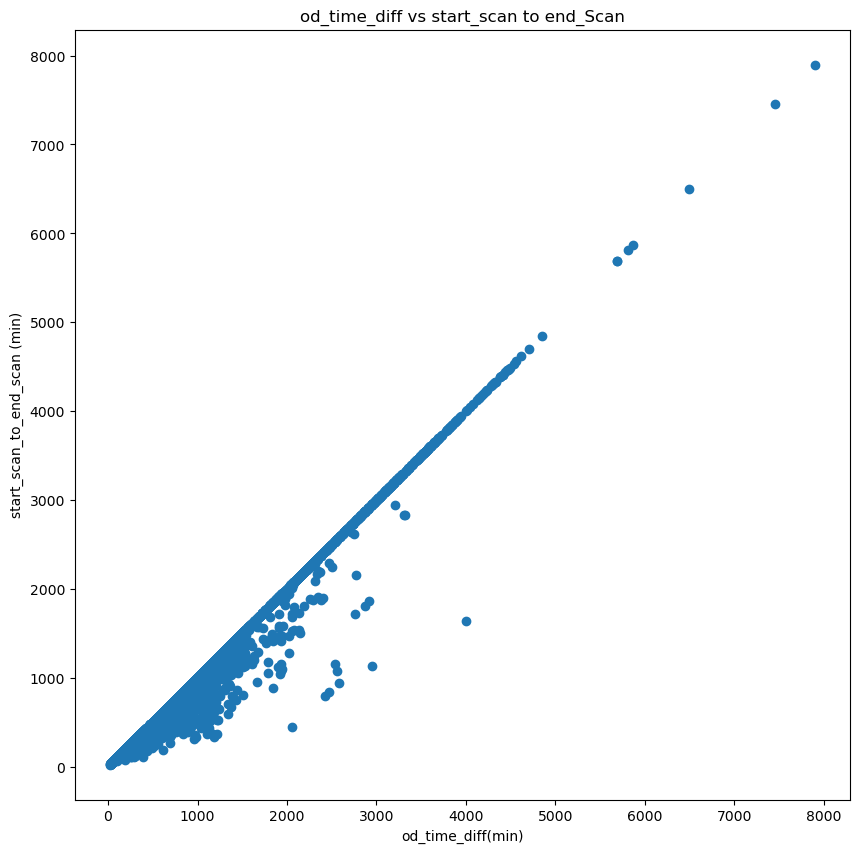

In [67]:
# Scatterplot of od_time_diff vs start_scan_to_end_scan
plt.rcParams['figure.figsize'] = (10, 10)
plt.scatter(trip_df['od_time_diff'], trip_df['start_scan_to_end_scan'])
plt.xlabel('od_time_diff(min)')
plt.ylabel('start_scan_to_end_scan (min)')
plt.title('od_time_diff vs start_scan to end_Scan')
plt.show()

In [68]:
df_trips_analysis['od_time_diff'].corr(df_trips_analysis['start_scan_to_end_scan']) #Very high correlation

0.9953398308043467

In [69]:
#Shapiro test to see if the difference is normally distributed
print(stats.shapiro(df_trips_analysis['od_time_diff']-df_trips_analysis['start_scan_to_end_scan']))

ShapiroResult(statistic=0.29786592721939087, pvalue=0.0)


C:\Users\shuklas\AppData\Local\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [70]:
# Performing the paired sample t-test
stats.ttest_rel(df_trips_analysis['od_time_diff'], df_trips_analysis['start_scan_to_end_scan'])

TtestResult(statistic=34.60783063445061, pvalue=1.9515632873947445e-252, df=14799)

#### We reject the null hypothesis and conclude that relationship between od_time_diff and start_scan_to_end_scan is significant

#### 3.1 actual_time aggregated value and OSRM time aggregated value 
#### Null Hypothesis(H0): The relationship between actual_time aggregated value and OSRM time aggregated value Is not significant
#### Alternate Hypothesis(H1): The relationship between actual_time aggregated value and OSRM time aggregated value Is significant
#### Significance level (alpha): 0.05

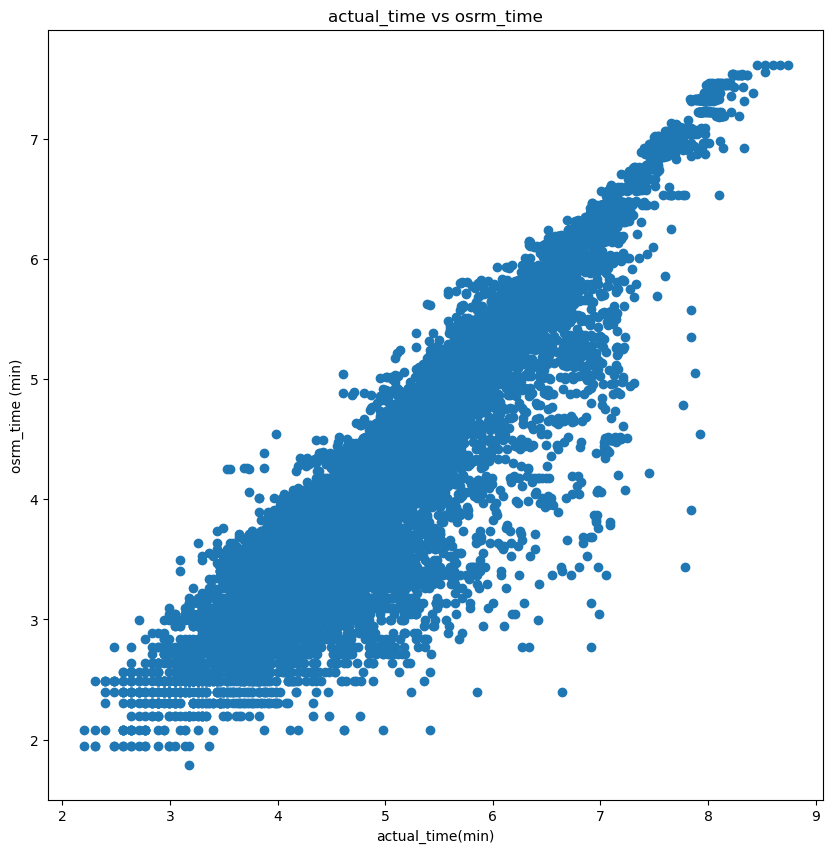

In [71]:
# Scatterplot of actual time vs OSRM Time
plt.rcParams['figure.figsize'] = (10, 10)
plt.scatter(df_trips_analysis['actual_time'], df_trips_analysis['osrm_time'])
plt.xlabel('actual_time(min)')
plt.ylabel('osrm_time (min)')
plt.title('actual_time vs osrm_time')
plt.show()

In [72]:
df_trips_analysis['actual_time'].corr(df_trips_analysis['osrm_time']) #Very high correlation

0.9244177286626158

In [73]:
#Shapiro test to see if the difference is normally distributed
print(stats.shapiro(df_trips_analysis['osrm_time']-df_trips_analysis['actual_time']))

ShapiroResult(statistic=0.8979371786117554, pvalue=0.0)


The distribution isn't normal,but scatter plots and correlation indicate a significant relationship. We do a paired 2tail sample test for further confirmation

In [74]:
# Performing the paired sample t-test
stats.ttest_rel(df_trips_analysis['actual_time'], df_trips_analysis['osrm_time'])

TtestResult(statistic=221.7674240104211, pvalue=0.0, df=14799)

#### We reject the null hypothesis and conclude that relationship between actual_time and osrm_time is significant

#### 3.2 actual_time aggregated value and segment actual time aggregated value 
#### Null Hypothesis(H0): The relationship between actual_time aggregated value and segment_actual_time aggregated value Is not significant
#### Alternate Hypothesis(H1): The relationship between actual_time aggregated value and segment_actual_time aggregated value Is  significant
#### Significance level (alpha): 0.05

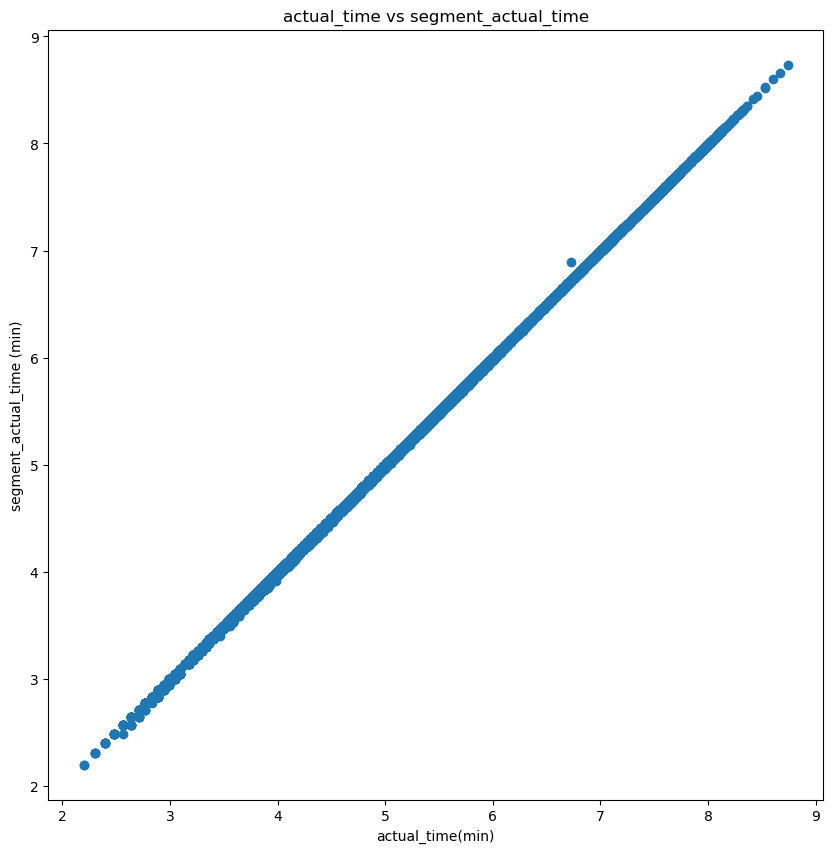

In [75]:
# Scatterplot of actual time vs segment_actual_time
plt.rcParams['figure.figsize'] = (10, 10)
plt.scatter(df_trips_analysis['actual_time'], df_trips_analysis['segment_actual_time'])
plt.xlabel('actual_time(min)')
plt.ylabel('segment_actual_time (min)')
plt.title('actual_time vs segment_actual_time')
plt.show()

In [76]:
df_trips_analysis['actual_time'].corr(df_trips_analysis['segment_actual_time']) #Very high correlation

0.9999651867827977

In [77]:
#Shapiro test to see if the difference is normally distributed
print(stats.shapiro(df_trips_analysis['segment_actual_time']-df_trips_analysis['actual_time']))

ShapiroResult(statistic=0.8738062381744385, pvalue=0.0)


The distribution isn't normal,but scatter plots and correlation indicate a significant relationship. We do a paired 2tail sample test for further confirmation

In [78]:
# Performing the paired sample t-test
stats.ttest_rel(df_trips_analysis['actual_time'], df_trips_analysis['segment_actual_time'])

TtestResult(statistic=128.91488010573616, pvalue=0.0, df=14799)

#### We reject the null hypothesis and conclude that relationship between actual_time and segment_actual_time is significant

#### 3.3 osrm distance aggregated value and segment osrm distance aggregated value aggregated value 
#### Null Hypothesis(H0): The relationship between osrm_distance aggregated value and segment_osrm_distance aggregated value Is not significant
#### Alternate Hypothesis(H1): The relationship between osrm_distance aggregated value and segment_osrm_distance aggregated value Is  significant
#### Significance level (alpha): 0.05

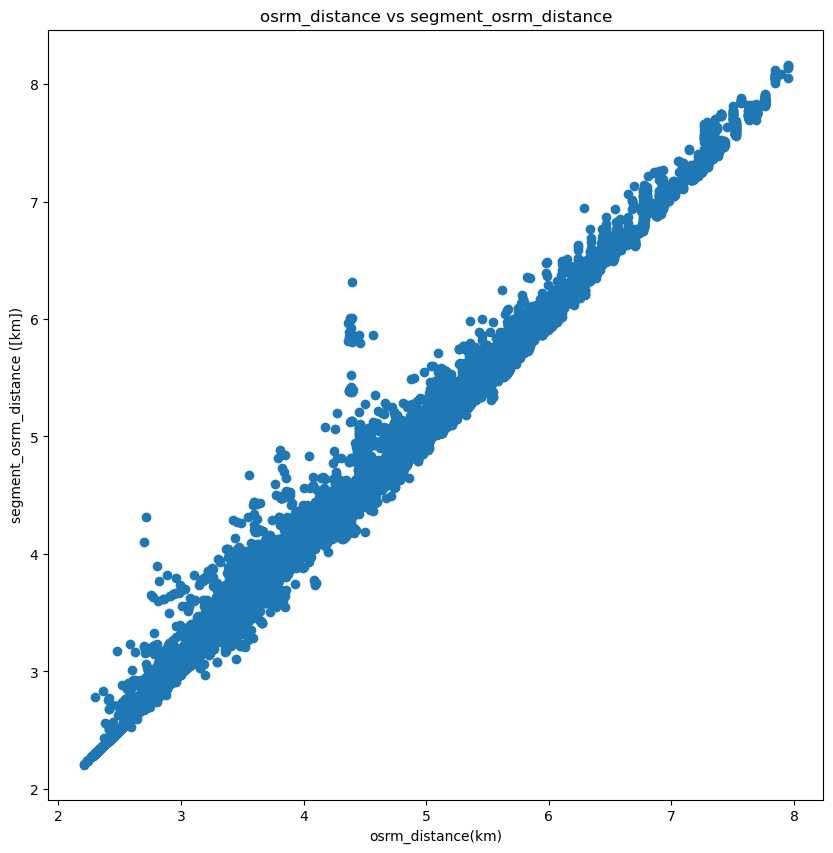

In [79]:
# Scatterplot of osrm_distance vs segment_osrm_distance
plt.rcParams['figure.figsize'] = (10, 10)
plt.scatter(df_trips_analysis['osrm_distance'], df_trips_analysis['segment_osrm_distance'])
plt.xlabel('osrm_distance(km)')
plt.ylabel('segment_osrm_distance ([km])')
plt.title('osrm_distance vs segment_osrm_distance')
plt.show()

In [80]:
df_trips_analysis['osrm_distance'].corr(df_trips_analysis['segment_osrm_distance']) #Very high correlation

0.9934799348114883

In [81]:

#Shapiro test to see if the difference is normally distributed
print(stats.shapiro(df_trips_analysis['osrm_distance']-df_trips_analysis['segment_osrm_distance']))

ShapiroResult(statistic=0.6959784030914307, pvalue=0.0)


The distribution isn't normal,but scatter plots and correlation indicate a significant relationship. We do a paired 2tail sample test for further confirmation

In [82]:
# Performing the paired sample t-test
stats.ttest_rel(df_trips_analysis['segment_osrm_distance'], df_trips_analysis['osrm_distance'])

TtestResult(statistic=57.18651847895282, pvalue=0.0, df=14799)

#### We reject the null hypothesis and conclude that relationship between osrm_distance and segment_osrm_distance is significant

#### 3.4 osrm time aggregated value and segment osrm time aggregated value 
#### Null Hypothesis(H0): The relationship between osrm_time aggregated value and segment_osrm_time aggregated value Is not significant
#### Alternate Hypothesis(H1): The relationship between osrm_time aggregated value and segment_osrm_time aggregated value Is  significant
#### Significance level (alpha): 0.05

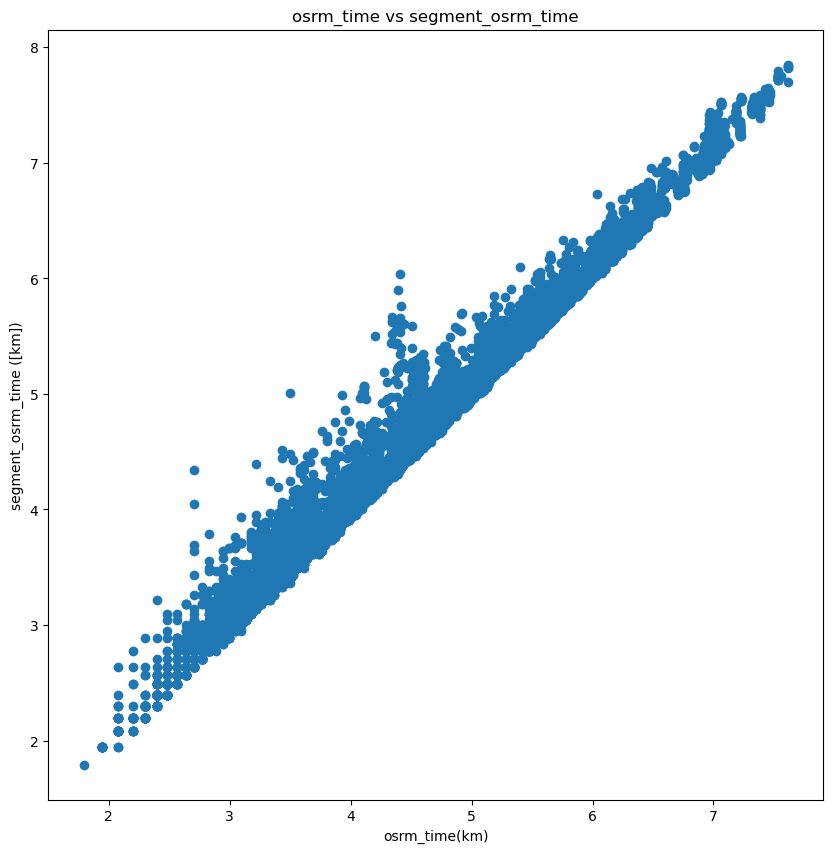

In [83]:
# Scatterplot of osrm_time vs segment_osrm_time
plt.rcParams['figure.figsize'] = (10, 10)
plt.scatter(df_trips_analysis['osrm_time'], df_trips_analysis['segment_osrm_time'])
plt.xlabel('osrm_time(km)')
plt.ylabel('segment_osrm_time ([km])')
plt.title('osrm_time vs segment_osrm_time')
plt.show()

In [84]:
df_trips_analysis['osrm_time'].corr(df_trips_analysis['segment_osrm_time']) #Very high correlation

0.9919208315537373

In [85]:
#Shapiro test to see if the difference is normally distributed
print(stats.shapiro(df_trips_analysis['osrm_time']-df_trips_analysis['segment_osrm_time']))

ShapiroResult(statistic=0.7586230635643005, pvalue=0.0)


The distribution isn't normal,but scatter plots and correlation indicate a significant relationship. We do a paired 2tail sample test for further confirmation

In [86]:
# Performing the paired sample t-test
stats.ttest_rel(df_trips_analysis['segment_osrm_time'], df_trips_analysis['osrm_time'])

TtestResult(statistic=61.57373665022184, pvalue=0.0, df=14799)

#### We reject the null hypothesis and conclude that relationship between osrm_time and segment_osrm_time is significant

### 4. Column Normalization /Column Standardization

In [87]:
num_col_list = [ i for i in num_columns]

num_df = df_trips_analysis[num_col_list]
# create an instance of the StandardScaler class
scaler = StandardScaler()

# fit and transform the numerical data using the StandardScaler
scaled_df = scaler.fit_transform(num_df)

# convert the scaled data back into a DataFrame
scaled_df = pd.DataFrame(scaled_df, columns=num_df.columns)

In [88]:
scaled_df.head()

,city_count,states_count,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,od_time_diff,trip_creation_month,trip_creation_year,trip_creation_day,Factor,Segment_factor
0,0.570477,2.996512,1.973464,1.994667,1.889170,1.927059,1.971785,1.888148,2.094300,2.125818,1.926995,-0.369747,0.0,-0.808537,-0.128401,-0.662135
1,0.570477,-0.508596,-0.552896,0.095154,-0.140525,-0.060083,0.018274,-0.143362,-0.160471,-0.044088,-0.566095,-0.369747,0.0,-0.808537,-0.205245,0.053944
2,0.570477,2.996512,2.527207,2.660402,2.536139,2.674960,2.659922,2.532019,2.633237,2.643129,2.475128,-0.369747,0.0,-0.808537,-0.399280,-0.446209
3,-0.286078,-0.508596,-1.139902,-1.041668,-0.892091,-1.335139,-1.146899,-0.882064,-1.313462,-1.182003,-1.151239,-0.369747,0.0,-0.808537,1.157453,1.154001
4,0.570477,-0.508596,0.827387,0.530180,0.597230,0.397707,0.451972,0.602939,0.308807,0.394159,0.793605,-0.369747,0.0,-0.808537,0.505041,0.695930


In [89]:
# Concat scaled_df with the original dataframe
df_trips_scaled = df_trips_analysis.drop(num_col_list, axis=1).reset_index()
df_trips_scaled = pd.concat([df_trips_scaled,scaled_df],axis=1)
df_trips_scaled.head()

,index,data,route_type,trip_uuid,source_center,source_city,source_place,source_DC,source_state,destination_center,...,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,od_time_diff,trip_creation_month,trip_creation_year,trip_creation_day,Factor,Segment_factor
0,0,training,FTL,trip-153671041653548748,IND462022AAA,Bhopal,Trnsport,H,Madhya Pradesh,IND000000ACB,...,1.971785,1.888148,2.094300,2.125818,1.926995,-0.369747,0.0,-0.808537,-0.128401,-0.662135
1,1,training,Carting,trip-153671042288605164,IND572101AAA,Tumkur,Veersagr,I,Karnataka,IND562101AAA,...,0.018274,-0.143362,-0.160471,-0.044088,-0.566095,-0.369747,0.0,-0.808537,-0.205245,0.053944
2,2,training,FTL,trip-153671043369099517,IND562132AAA,Bengaluru,Nelmngla,H,Karnataka,IND160002AAC,...,2.659922,2.532019,2.633237,2.643129,2.475128,-0.369747,0.0,-0.808537,-0.399280,-0.446209
3,3,training,Carting,trip-153671046011330457,IND400072AAB,Mumbai Hub,unknown_src_plc,unknown_src_DC,Maharashtra,IND401104AAA,...,-1.146899,-0.882064,-1.313462,-1.182003,-1.151239,-0.369747,0.0,-0.808537,1.157453,1.154001
4,4,training,FTL,trip-153671052974046625,IND583101AAA,Bellary,Dc,D,Karnataka,IND583101AAA,...,0.451972,0.602939,0.308807,0.394159,0.793605,-0.369747,0.0,-0.808537,0.505041,0.695930


### 5. Handling categorical values

In [90]:
# listing all categorical features
cat_cols = [ele for ele in trip_df.select_dtypes(include=['object']).columns if ele not in ['trip_uuid','data','source_center','destination_center']]
cat_cols
# trip_uuid','data','source_center','destination_center' are ignored, as they are merely identifiers and do not add real information to the data

['route_type',
 'source_city',
 'source_place',
 'source_DC',
 'source_state',
 'dest_city',
 'dest_place',
 'dest_DC',
 'dest_state']

In [91]:
df_trips_scaled['route_type'].value_counts()

Carting    8906
FTL        5894
Name: route_type, dtype: int64

In [92]:
# Using label_encoder on route_type
df_trips_category = df_trips_scaled.copy()
label_encoder = LabelEncoder()
col='route_type'
df_trips_category[col] = label_encoder.fit_transform(df_trips_category[col])
df_trips_category[col].value_counts()

0    8906
1    5894
Name: route_type, dtype: int64

In [93]:
# Since the cardinality of all other,categorical features are high, so we can't use One Hot Encoding, so we replace those with value_counts %
for column in ['source_city','source_place','source_DC','source_state','dest_city','dest_place','dest_DC','dest_state']:
    value_counts = df_trips_category[column].value_counts(normalize=True)
    df_trips_category[column] = df_trips_category[column].map(value_counts)

In [94]:
df_trips_category.head()

,index,data,route_type,trip_uuid,source_center,source_city,source_place,source_DC,source_state,destination_center,...,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,od_time_diff,trip_creation_month,trip_creation_year,trip_creation_day,Factor,Segment_factor
0,0,training,1,trip-153671041653548748,IND462022AAA,0.008649,0.006757,0.185270,0.022432,IND000000ACB,...,1.971785,1.888148,2.094300,2.125818,1.926995,-0.369747,0.0,-0.808537,-0.128401,-0.662135
1,1,training,0,trip-153671042288605164,IND572101AAA,0.000878,0.000878,0.093378,0.150608,IND562101AAA,...,0.018274,-0.143362,-0.160471,-0.044088,-0.566095,-0.369747,0.0,-0.808537,-0.205245,0.053944
2,2,training,1,trip-153671043369099517,IND562132AAA,0.119595,0.049459,0.185270,0.150608,IND160002AAC,...,2.659922,2.532019,2.633237,2.643129,2.475128,-0.369747,0.0,-0.808537,-0.399280,-0.446209
3,3,training,0,trip-153671046011330457,IND400072AAB,0.020270,0.034459,0.082905,0.181216,IND401104AAA,...,-1.146899,-0.882064,-1.313462,-1.182003,-1.151239,-0.369747,0.0,-0.808537,1.157453,1.154001
4,4,training,1,trip-153671052974046625,IND583101AAA,0.001216,0.002365,0.129054,0.150608,IND583101AAA,...,0.451972,0.602939,0.308807,0.394159,0.793605,-0.369747,0.0,-0.808537,0.505041,0.695930


 ### 6.Recommendations

1. Most of the parcels are delivered within Bangalore.Since the distance covered is low, Delhivery can set aside smaller trucks, or 2 wheelers for delivery, and reserve trucks for long distance trip.However, Delhivery has to be careful that enough vehichles are in place to address Bengaluru's demand. 
2. Other cities where there's a demand for large intercity deliveries are Hyderabad and Mumbai.Delhivery should have a appropriate fleet of vehicles to meet demand.
3. There is significant traffic in Bhiwandi -Mumbai Corridor. This can either be a transit route, or a proper delivery route. If this is a transit route, Delhivery can use Bhiwandi a pitstop to transfer goods from one truck to the one going to mumbai, and free up the truck arriving at Bhiwandi for other deliveries.
4. Delhi-Gawahati corridor takes a longer time, compared to other similar distance corridors. Delhivery should look at the bottlenecks that is causing this delay.